In [1]:
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
import pandas as pd

global local_dir
global z_bin
global qlor
global lbl

local_dir = "/home/colgoat/TFPS"
#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
#num = Number of redshift bins to be plotted
#ini = Starter plotting bin
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]
qlor = ["magenta","red","blue","black","lime","orange","cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]
lbl = ["z = 2.2","z = 2.4","z = 2.6","z = 2.8","z = 3.0","z = 3.2","z = 3.4","z = 3.6","z = 3.8","z = 4.0","z = 4.2","z = 4.4","z = 4.6"]


In [3]:
def plotter_single(n,ini,fin,pha,mark,ms,ls):
    
    while (fin>13):
        fin = input('Below 13:')
        fin = int(fin)
        
    local_file = os.path.join(local_dir,n)
    PS=Table.read(local_file)


    plt.rcParams["figure.figsize"] = [18, 12]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['font.size'] = '16'

    bines = fin - ini
    
    
    for a in range(bines):
        binZ = (PS['zbin'] == z_bin[ini+a])
        pl = PS[binZ]
        k = pl['meank']
        P = (pl['meanPk'] *  pl['meank'])/np.pi
        er = (pl['errorPk'] *  pl['meank'])/np.pi
        
        plt.errorbar(k , P , yerr = er, marker = mark, label = lbl[ini+a], 
                     markersize = ms, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
        
        
    plt.xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
    plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$', size = 30)
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", color = 'gray', linewidth = 0.5)
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
    plt.title(f'Transmitted Flux Power Spectrum {n}', size = 30)
    plt.show()

In [4]:
def plotter_compar(N,ini,fin):
    
    while (fin>13):
        fin = input('Must be major 13:')
        fin = int(fin)
        
    bines = fin - ini
    plt.rcParams["figure.figsize"] = [18, 12]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['font.size'] = '16'
    
    loop1 = ['o','*','s','^','d']
    loop2 = ['-',':','--','-.','-']
    
    name = []
    
    for x in range(N):
        
        n = input(f'Name of file {x+1} on disk:')
        par_ask = input(f'Default parameters?(1/0)')
        par_ask = int(par_ask)
        
        name.append(n)
        
        if (par_ask == 1):
            mark = loop1[x]
            ms = 10
            pha = 0.7
            ls = loop2[x]
        else:
            print(f'For {x+1}:')
            mark = input('Marker:')
            ms = input('Markersize:')
            ms = int(ms)
            pha = input('Alpha:')
            pha = float(pha)
            ls = input('Linestyle:')
            
        local_file = os.path.join(local_dir,n)
        PS=Table.read(local_file)
        for a in range(bines):
            binZ = (PS['zbin'] == z_bin[ini+a])
            pl = PS[binZ]
            k = pl['meank']
            P = (pl['meanPk'] *  pl['meank'])/np.pi
            er = (pl['errorPk'] *  pl['meank'])/np.pi
            plt.errorbar(k , P , yerr = er, marker = mark, label = lbl[ini+a],
                         markersize = ms, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
        
    plt.xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
    plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$', size = 30)
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", color = 'gray', linewidth = 0.5)
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1, box.height])
    
    ax.legend(lbl[ini:fin]
              ,loc = 'lower right',bbox_to_anchor=(1, 0.025), ncol=5, fontsize = 20)
    plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
    
        
    
    
    props = dict(boxstyle='round', facecolor='white', alpha=0.7)
    
    
    textstr = '\n'.join('\n')
    
    for v in range(N):
        if (loop1[v] == 'o'):
            textstr = textstr + str(v+1)+ ". " + '['+ r'$\bullet$' +'] ' + str(name[v]) + '\n'
        if (loop1[v] == '*'):
            textstr = textstr + str(v+1)+ ". " + '['+ r'$\star$' +'] ' + str(name[v]) + '\n'
        if (loop1[v] == 's'):
            textstr = textstr + str(v+1)+ ". " + '['+ r'$\boxdot$' +'] ' + str(name[v]) + '\n'
        if (loop1[v] == '^'):
            textstr = textstr + str(v+1)+ ". " + '['+ r'$\blacktriangle$' +'] ' + str(name[v]) + '\n'
        if (loop1[v] == 'd'):
            textstr = textstr + str(v+1)+ ". " + '['+ r'$\diamond$' +'] ' + str(name[v]) + '\n'
            
        
    
    
    ax.text(0.05,0.95,textstr, transform=ax.transAxes, fontsize=20,verticalalignment='top', bbox= props)
    
    plt.title(f'Transmitted Flux Power Spectrum comparison', size = 30)
    plt.show()

In [5]:
def compar_singlebin2(n1,n2,ini):
    
    while (ini>13):
        ini = input('Must be minor than 13:')
        ini = int(ini)
        
    local_file1 = os.path.join(local_dir,n1)
    PS1=Table.read(local_file1)
    
    local_file2 = os.path.join(local_dir,n2)
    PS2=Table.read(local_file2)
        
    binZ1 = (PS1['zbin'] == z_bin[ini])
    pl1 = PS1[binZ1]
    k1 = pl1['meank']
    P1 = (pl1['meanPk'] *  pl1['meank'])/np.pi
    er1 = (pl1['errorPk'] *  pl1['meank'])/np.pi
    fu_1 = ((er1)) + (P1)
    fl_1 = (P1) - ((er1))
    
    binZ2 = (PS2['zbin'] == z_bin[ini])
    pl2 = PS2[binZ2]
    k2 = pl2['meank']
    P2 = (pl2['meanPk'] *  pl2['meank'])/np.pi
    er2 = (pl2['errorPk'] *  pl2['meank'])/np.pi
    fu_2 = ((er2)) + (P2)
    fl_2 = (P2) - ((er2))
    
    EP = abs((pl2['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
    
    fig, axs = plt.subplots(2,1,figsize=(18,12), gridspec_kw={'height_ratios': [2, 0.5]})
    
    axs[0].errorbar(k1,P1,yerr = er1, marker = 's', label = "bin z = "+str(z_bin[ini])+"  "+str(n1), markersize = 7,\
        color = qlor[ini], alpha = 0.6, mec ='k', linestyle = "--")
    axs[0].fill_between(k1,fu_1,fl_1, alpha = 0.1,label = 'Error coverage ' + str(n1))
    
    axs[0].errorbar(k2,P2,yerr = er2, marker = 'o', label = "bin z = "+str(z_bin[ini])+"  "+str(n2), markersize = 8, \
        color = qlor[ini], alpha = 0.7, mec ='k', linestyle = "-")
    axs[0].fill_between(k2,fu_2,fl_2, alpha = 0.1,label = 'Error coverage '+ str(n2))
    
    
    axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]', size = 30)
    axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
    axs[0].legend(loc='upper left')
    axs[0].set_xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
    
    axs[1].plot(k1,EP, marker = 'o', markersize = 8,color = qlor[ini], alpha = 0.7, mec ='k')
    axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
    axs[1].set_ylabel('% diff', size = 30)
    axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)

In [7]:
def p1d_HQv(n,ini,fin,pha,mark,ms,ls,survey,DPI,w,h,AlS,LS,TS,Nc):
    
    while (fin>13):
        fin = input('Below 13:')
        fin = int(fin)
    
    local_file = os.path.join(local_dir,n)
    p1d_file = pyfits.open(local_file)
    PS = Table.read(p1d_file[1])
    chunks = Table.read(p1d_file[2])

    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['axes.spines.bottom'] = True
    plt.rcParams["figure.figsize"] = [19, 10]
    plt.rcParams["figure.autolayout"] = True

    plt.figure(figsize=(w,h),dpi=int(DPI))

    bines = fin - ini
    
    PROJECT = np.char.find(n, "DESI", start=0, end=None)
    
    N_forest = []
    
    if (PROJECT<0):
        
        for a in range(bines):
            binZ = (PS['zbin'] == z_bin[ini+a])
            pl = PS[binZ]
            k = pl['meank']
            P = (pl['meanPk'] *  pl['meank'])/np.pi
            er = (pl['errorPk'] *  pl['meank'])/np.pi
        
            plt.errorbar(k , P , yerr = er, marker = mark, 
                         label = lbl[ini+a]+' ('+str(int(chunks['N_chunks'][a]))+ ' forests)',
                         markersize = ms, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
            N_forest.append(chunks['N_chunks'][a])
        
        
        plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique',
                   family = 'serif', size = AlS)          
        plt.xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = AlS)
        plt.yscale('log')
        plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
        ax = plt.subplot(111)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 1, box.height])
        ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.010), ncol=Nc, fontsize = LS)
        plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020],fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.title(f'Transmitted Flux Power Spectrum (P1D) {str(survey)} quasar sample', weight='semibold',
                  style= 'normal', family = 'serif', size =TS)
        plt.show()
        
    else:
        
        cut = np.array([45,48,51,54,57,60,63,66,69,72,75,78,81,84])
        
        for a in range(bines):
            binZ = (PS['zbin'] == z_bin[ini+a])
            pl = PS[binZ]
            k = pl['meank']
            P = (pl['meanPk'] *  pl['meank'])/np.pi
            er = (pl['errorPk'] *  pl['meank'])/np.pi
            k = k[0:cut[a]+1]
            P = P[0:cut[a]+1]
            er = er[0:cut[a]+1]
            
            plt.errorbar(k , P , yerr = er, marker = mark, 
                         label = lbl[ini+a]+' ('+str(int(chunks['N_chunks'][a]))+ ' forests)',
                         markersize = ms, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
            N_forest.append(chunks['N_chunks'][a])            
        
        
        plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique',
                   family = 'serif', size = AlS)          
        plt.xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = AlS)
        plt.yscale('log')
        plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
        ax = plt.subplot(111)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 1, box.height])
        ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.010), ncol=Nc, fontsize = LS)
        plt.xticks([0.000, 0.005, 0.010, 0.015,0.020, 0.025, 0.030,0.035,0.040],fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.title(f'Transmitted Flux Power Spectrum (P1D) {str(survey)} quasar sample', weight='semibold',
                  style= 'normal', family = 'serif', size =TS)
        plt.show()
    
    U = 0
    for b in range(len(N_forest)):
        U = N_forest[b] + U
        
    print(f'Number of forest {int(U)}')

In [7]:
def p1d_HQl(n,ini,fin,pha,mark,ms,ls,survey,DPI,w,h,AlS,LS,TS,Nc):
    
    while (fin>13):
        fin = input('Below 13:')
        fin = int(fin)
        
    local_file = os.path.join(local_dir,n)
    p1d_file = pyfits.open(local_file)
    PS = Table.read(p1d_file[1])
    chunks = Table.read(p1d_file[2])


    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['axes.spines.bottom'] = True
    plt.rcParams["figure.figsize"] = [19, 10]
    plt.rcParams["figure.autolayout"] = True

    plt.figure(figsize=(w,h),dpi=int(DPI))

    bines = fin - ini
    
    N_forest = []
    
    for a in range(bines):
        binZ = (PS['zbin'] == z_bin[ini+a])
        pl = PS[binZ]
        k = pl['meank']
        P = (pl['meanPk'] *  pl['meank'])/np.pi
        er = (pl['errorPk'] *  pl['meank'])/np.pi
        plt.errorbar(k , P , yerr = er, marker = mark,  
                     label = lbl[ini+a]+' ('+str(int(chunks['N_chunks'][a]))+ ' forests)',
                     markersize = ms, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
        N_forest.append(chunks['N_chunks'][a])
        
    plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique', family = 'serif', size = AlS)
    plt.xlabel('$\overline{k}$ $(\AA^{-1})$',style = 'oblique', family = 'serif', size = AlS)
    plt.yscale('log')
    plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1, box.height])
    ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.025), ncol=Nc, fontsize = LS)
    plt.xticks([0.0,0.25,0.50,0.75,1.0,1.25,1.50,1.75,2.0],fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(f'Transmitted Flux Power Spectrum {str(survey)} sample', weight='semibold', 
                style= 'normal', family = 'serif', size =TS)
    plt.show()
    
    U = 0
    for b in range(len(N_forest)):
        U = N_forest[b] + U
        
    print(f'Number of forest {int(U)}')

In [11]:
def error_compar2(n1,n2,ini,fin,Hr1,Hr2,Wf,Hf,title1,title2,TITLE='Transmitted Flux Power Spectrum comparison'):

    while (ini>13):
        ini = input('Must be minor than 13:')
        ini = int(ini)
         
    local_file1 = os.path.join(local_dir,n1)
    p1d_file1 = pyfits.open(local_file1)
    PS1 = Table.read(p1d_file1[1])
    chunks1 = Table.read(p1d_file1[2])
    
    local_file2 = os.path.join(local_dir,n2)
    p1d_file2 = pyfits.open(local_file2)
    PS2 = Table.read(p1d_file2[1])
    chunks2 = Table.read(p1d_file2[2])
    
    
    bines = fin - ini
    
    
    fig, axs = plt.subplots(2,1,figsize=(Wf,Hf), gridspec_kw={'height_ratios': [Hr1, Hr2]}, dpi = 100)
        
    for a in range(bines):
        binZ1 = (PS1['zbin'] == z_bin[ini+a])
        pl1 = PS1[binZ1]
        k1 = pl1['meank']
        P1 = (pl1['meanPk'] *  pl1['meank'])/np.pi
        er1 = (pl1['errorPk'] *  pl1['meank'])/np.pi
        fu_1 = ((er1)) + (P1)
        fl_1 = (P1) - ((er1))
        axs[0].errorbar(k1,P1,yerr = er1, marker = '*', 
                        label = lbl[ini+a]+' ('+str(int(chunks1['N_chunks'][a]))+ ' forests)',
                        markersize = 7,color = qlor[ini+a], alpha = 0.7, mec ='k', linestyle = "--") 
        axs[0].fill_between(k1,fu_1,fl_1, alpha = 0.1)
        
    for a in range(bines):
        binZ2 = (PS2['zbin'] == z_bin[ini+a])
        pl2 = PS2[binZ2]
        k2 = pl2['meank']
        P2 = (pl2['meanPk'] *  pl2['meank'])/np.pi
        er2 = (pl2['errorPk'] *  pl2['meank'])/np.pi
        fu_2 = ((er2)) + (P2)
        fl_2 = (P2) - ((er2))
        EP = abs((pl2['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
        
        axs[0].errorbar(k2,P2,yerr = er2, marker = 'o', 
                        label = lbl[ini+a]+' ('+str(int(chunks2['N_chunks'][a]))+ ' forests)',
                        markersize = 8, color = qlor[ini+a], alpha = 0.6, mec ='k', linestyle = "-")
        axs[0].fill_between(k2,fu_2,fl_2, alpha = 0.1)
    
    
    AVE_ERROR = []
        
    for a in range(bines):
        binZ1 = (PS1['zbin'] == z_bin[ini+a])
        pl1 = PS1[binZ1]
        
        binZ2 = (PS2['zbin'] == z_bin[ini+a])
        pl2 = PS2[binZ2]
        EP = abs((pl2['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
        ave_flab = np.mean(np.array(EP))
        axs[1].plot(k2,EP, marker = '.', markersize = 8,
                    color = qlor[ini+a], alpha = 0.7,
                    label = r'$\mu\sim$'+str(round(ave_flab,1)),mec ='k')
        AVE_ERROR.append(ave_flab)
        
    AVE_ERROR = np.array(AVE_ERROR)
    
    
    axs[0].set_title(f'{TITLE}', weight='semibold', 
                style= 'normal', family = 'serif', size =30)
    
    axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]', size = 30)
    axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
    axs[0].set_xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
    axs[0].set_yscale('log')
    
    
    txt_prop = {'size' :12}
    txt_propT = {'style' : 'normal', 'family' : 'serif', 'size' :20, 'weight':'semibold'}
    
    S = r'[$\star$]'
    B = r'[$\bullet$]'
    
    
    axs[0].legend(loc = 'lower right', ncol= 4, prop = txt_prop,
                  title_fontproperties=txt_propT,
                  title=f'{S} {title1} | {B} {title2}')

    
    
    

    axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
    axs[1].set_ylabel('% diff', size = 30)
    axs[1].set_ylim(5, 50)
    axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
    axs[1].legend(loc = 'upper center', ncol=7, fontsize = 12)
    plt.title(f'Percentage ratio', size = 30)
    print(f'Average difference {round(np.mean(AVE_ERROR),2)}%')

Average difference 4.13%


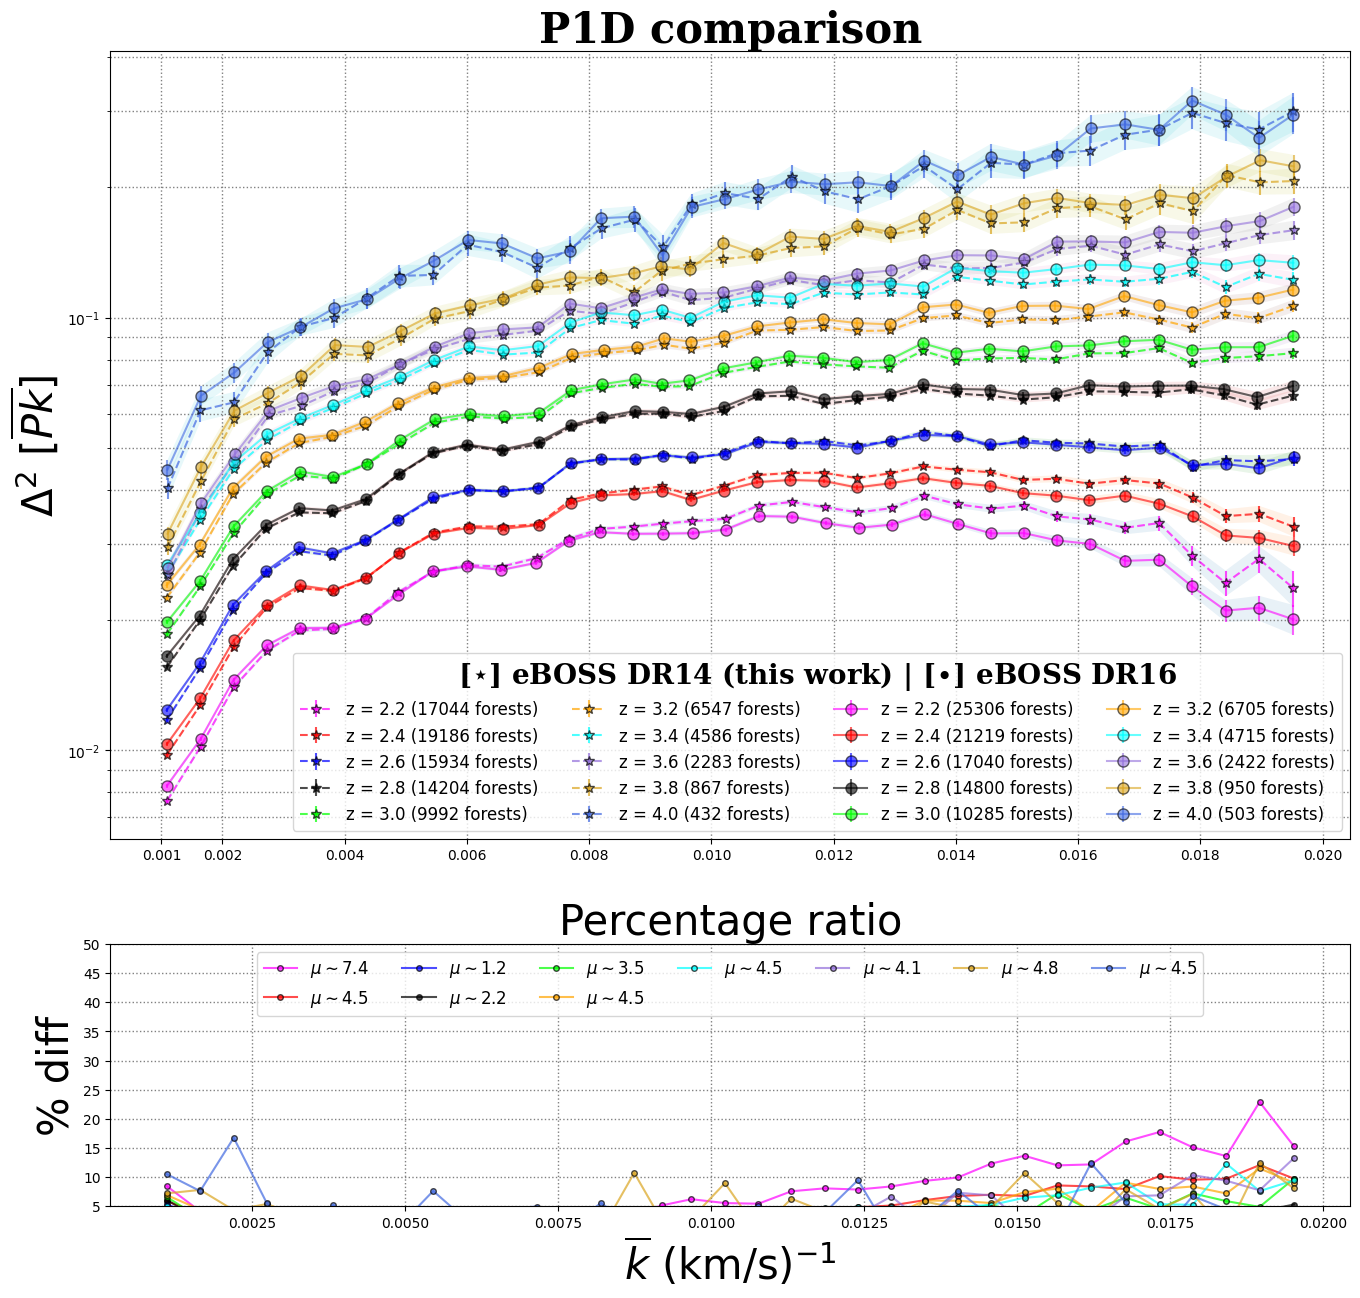

In [12]:
#P1D_eBOSS_Chabanier2019_results.fits
#P1D_eBOSS_DR14_Standard-v4.fits.gz
#P1D_eBOSS_DR14_NcorF.fits.gz

error_compar2('P1D_eBOSS_DR14_Standard-v4.fits.gz','P1D_eBOSS_DR16_Standard-v4.fits.gz',
              0,10,3,1,16,15,
              'eBOSS DR14 (this work)','eBOSS DR16','P1D comparison')

In [2]:
def error_compar2_lambda(n1,n2,ini,fin,Hr1,Hr2,Wf,Hf,title1,title2,TITLE='Transmitted Flux Power Spectrum comparison'):

    while (ini>13):
        ini = input('Must be minor than 13:')
        ini = int(ini)
         
    local_file1 = os.path.join(local_dir,n1)
    p1d_file1 = pyfits.open(local_file1)
    PS1 = Table.read(p1d_file1[1])
    chunks1 = Table.read(p1d_file1[2])
    
    local_file2 = os.path.join(local_dir,n2)
    p1d_file2 = pyfits.open(local_file2)
    PS2 = Table.read(p1d_file2[1])
    chunks2 = Table.read(p1d_file2[2])
    
    
    bines = fin - ini
    
    
    fig, axs = plt.subplots(2,1,figsize=(Wf,Hf), gridspec_kw={'height_ratios': [Hr1, Hr2]}, dpi = 100)
        
    for a in range(bines):
        binZ1 = (PS1['zbin'] == z_bin[ini+a])  & (PS1['meank'] <= 2.02)
        pl1 = PS1[binZ1]
        k1 = pl1['meank']
        P1 = (pl1['meanPk'] *  pl1['meank'])/np.pi
        er1 = (pl1['errorPk'] *  pl1['meank'])/np.pi
        fu_1 = ((er1)) + (P1)
        fl_1 = (P1) - ((er1))
        axs[0].errorbar(k1,P1,yerr = er1, marker = '*', 
                        label = lbl[ini+a]+' ('+str(int(chunks1['N_chunks'][a+ini]))+ ' forests)',
                        markersize = 6,color = qlor[ini+a], alpha = 0.7, mec ='k', linestyle = "--") 
        axs[0].fill_between(k1,fu_1,fl_1, alpha = 0.1)
        
    for a in range(bines):
        binZ2 = (PS2['zbin'] == z_bin[ini+a]) & (PS2['meank'] <= 2.02)
        pl2 = PS2[binZ2]
        k2 = pl2['meank']
        P2 = (pl2['meanPk'] *  pl2['meank'])/np.pi
        er2 = (pl2['errorPk'] *  pl2['meank'])/np.pi
        fu_2 = ((er2)) + (P2)
        fl_2 = (P2) - ((er2))
        EP = abs((pl2['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
        
        axs[0].errorbar(k2,P2,yerr = er2, marker = 'o', 
                        label = lbl[ini+a]+' ('+str(int(chunks2['N_chunks'][a+ini]))+ ' forests)',
                        markersize = 6, color = qlor[ini+a], alpha = 0.6, mec ='k', linestyle = "-")
        axs[0].fill_between(k2,fu_2,fl_2, alpha = 0.1)
    
    
    AVE_ERROR = []
        
    for a in range(bines):
        binZ1 = (PS1['zbin'] == z_bin[ini+a]) & (PS1['meank'] <= 2.02)
        pl1 = PS1[binZ1]
        
        binZ2 = (PS2['zbin'] == z_bin[ini+a]) & (PS2['meank'] <= 2.02)
        pl2 = PS2[binZ2]
        EP = abs((pl2['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
        ave_flab = np.mean(np.array(EP))
        axs[1].plot(k2,EP, marker = '.', markersize = 8,
                    color = qlor[ini+a], alpha = 0.7,
                    label = r'$\mu\sim$'+str(round(ave_flab,1)),mec ='k')
        AVE_ERROR.append(ave_flab)
        
    AVE_ERROR = np.array(AVE_ERROR)
    
    
    axs[0].set_title(f'{TITLE}', weight='semibold', 
                style= 'normal', family = 'serif', size =30)
    
    axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]', size = 30)
    axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
    axs[0].set_xticks([0.0,0.25,0.50,0.75,1.0,1.25,1.50,1.75,2.0])
    axs[0].set_yscale('log')
    
    
    txt_prop = {'size' :13}
    txt_propT = {'style' : 'normal', 'family' : 'serif', 'size' :17, 'weight':'semibold'}
    
    S = r'[$\star$]'
    B = r'[$\bullet$]'
    
    
    axs[0].legend(loc = 'lower right', ncol= 2, prop = txt_prop,
                  title_fontproperties=txt_propT,
                  title=f'{S} {title1} | {B} {title2}')

    
    
    

    axs[1].set_xlabel('$\overline{k}$ $(\AA^{-1})$', size = 30)
    axs[1].set_ylabel('% diff', size = 30)
    axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
    axs[1].legend(loc = 'upper center', ncol=7, fontsize = 15)
    plt.title(f'Percentage ratio', size = 30)
    print(f'Prepared for mean file from Corentin...')
    print(f'Average difference {round(np.mean(AVE_ERROR),2)}%')

Prepared for mean file from Corentin...
Average difference 3.99%


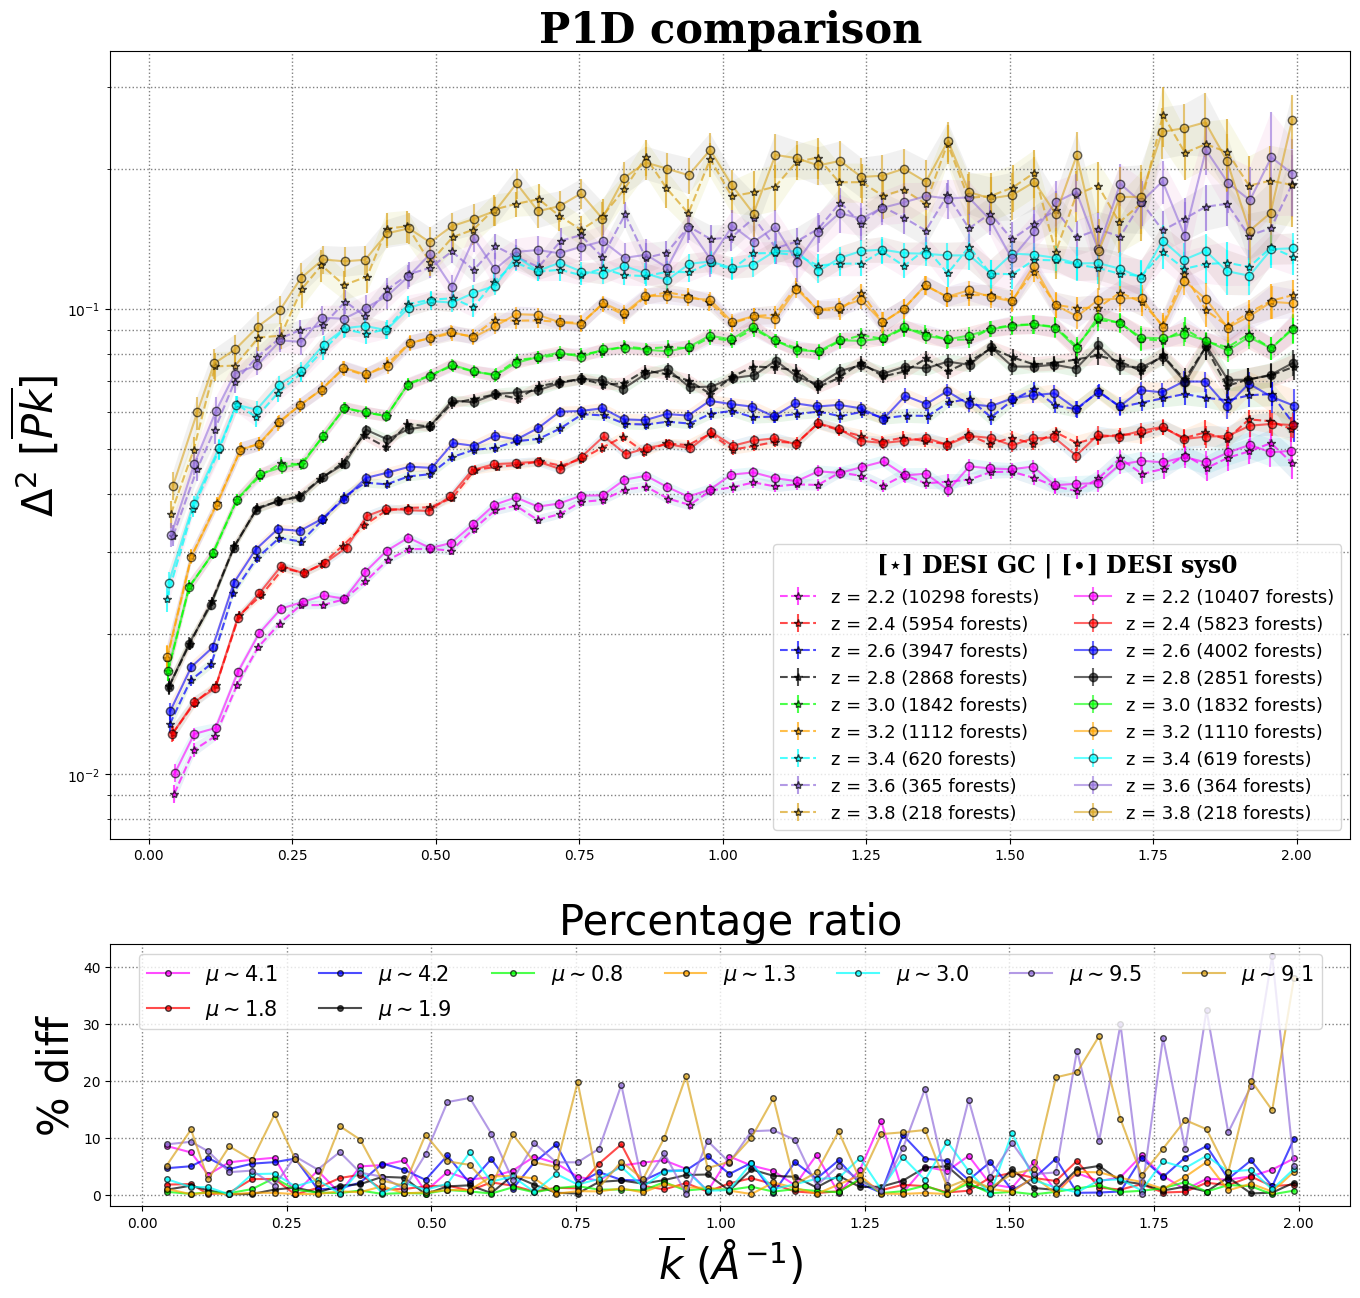

In [5]:
error_compar2_lambda('P1D_DESI_Standard.fits.gz','P1D_DESI_skynocor.fits.gz',
              0,9,3,1,16,15,
              'DESI GC','DESI sys0','P1D comparison')

Prepared for mean file from Corentin...
Average difference 9.77%
Average difference Pt1 13.82%
Average difference Pt2 5.49%


Text(0.0145, 0.0127, '5.49%')

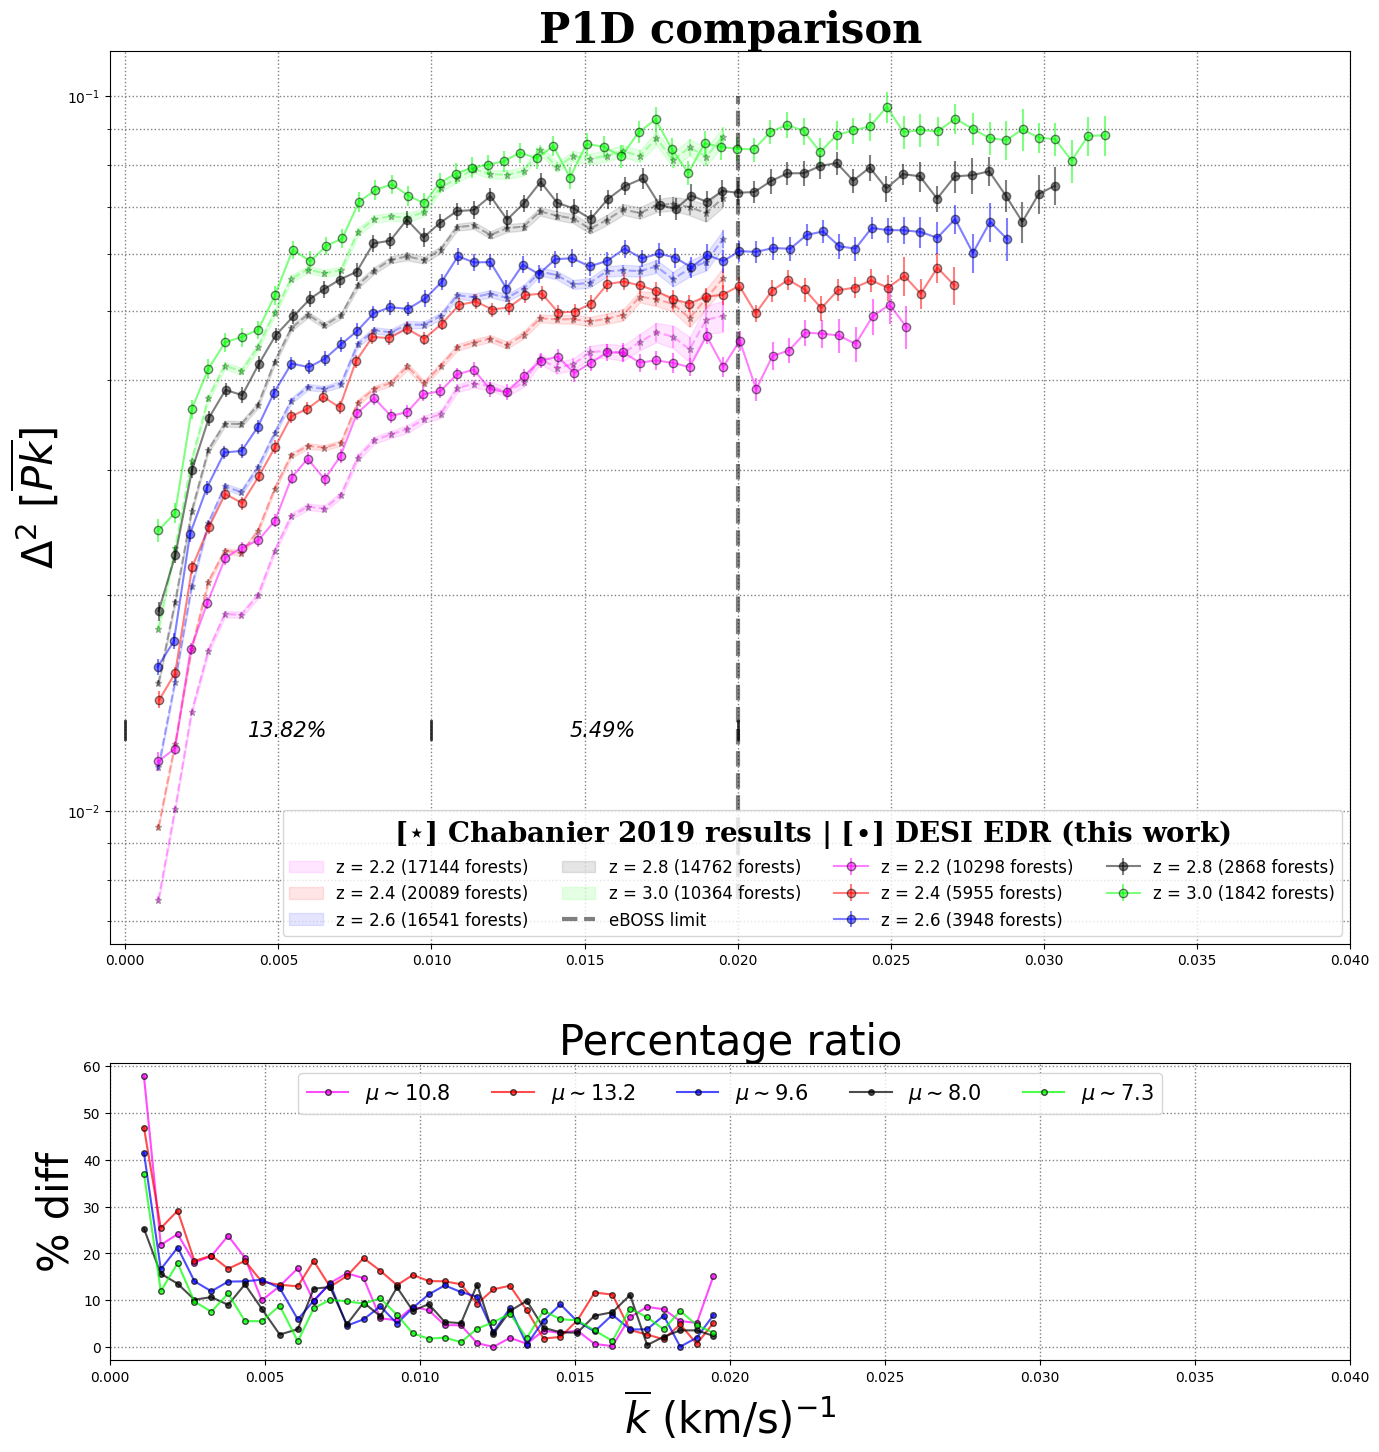

In [67]:
n1, n2 = ['P1D_eBOSS_Chabanier2019_results.fits','P1D_DESI_SC_vel_extent.fits.gz']


local_file1 = os.path.join(local_dir,n1)
p1d_file1 = pyfits.open(local_file1)
PS1 = Table.read(p1d_file1[1])
chunks1 = Table.read(p1d_file1[2])
    
local_file2 = os.path.join(local_dir,n2)
p1d_file2 = pyfits.open(local_file2)
PS2 = Table.read(p1d_file2[1])
chunks2 = Table.read(p1d_file2[2])
bines = 5 - 0
ini = 0
    
fig, axs = plt.subplots(2,1,figsize=(16,17), gridspec_kw={'height_ratios': [3,1]}, dpi = 100)
    
for a in range(bines+1):
    if (a==bines):
        axs[0].errorbar(k1,P1,yerr = er1, marker = 'none',
                     label = '',
                     markersize = 0,color = 'none', alpha = 0.0, mec ='none', linestyle = "-")
    else:
        binZ1 = (PS1['zbin'] == z_bin[ini+a])
        pl1 = PS1[binZ1]
        k1 = pl1['meank']
        P1 = (pl1['meanPk'] *  pl1['meank'])/np.pi
        er1 = (pl1['errorPk'] *  pl1['meank'])/np.pi
        fu_1 = ((er1)) + (P1)
        fl_1 = (P1) - ((er1))
        axs[0].errorbar(k1,P1,yerr = er1, marker = '*', 
                        label = '',
                        markersize = 5,color = qlor[ini+a], alpha = 0.3, mec ='k', linestyle = "--") 
        axs[0].fill_between(k1,fu_1,fl_1, alpha = 0.1,color = qlor[ini+a], 
                         label = lbl[ini+a]+' ('+str(int(chunks1['N_chunks'][a]))+ ' forests)')
        
        
    

cut = np.array([45,48,51,54,57,60,63,66,69,72,75,78,81,84])
        
for a in range(bines+1):
    if (a==bines):
        axs[0].errorbar(k1,P1,yerr = er1, marker = 'none', 
                     label = '',
                     markersize = 0,color = 'none', alpha = 0.0, mec ='none', linestyle = "-")
    else:
        binZ2 = (PS2['zbin'] == z_bin[ini+a])
        pl2 = PS2[binZ2]
        k2 = pl2['meank']
        P2 = (pl2['meanPk'] *  pl2['meank'])/np.pi
        er2 = (pl2['errorPk'] *  pl2['meank'])/np.pi
        k = k2[0:cut[a]+1]
        P = P2[0:cut[a]+1]
        er = er2[0:cut[a]+1]
        fu_2 = ((er2)) + (P2)
        fl_2 = (P2) - ((er2))
        fu_2 = fu_2[0:cut[a]+1]
        fl_2 = fl_2[0:cut[a]+1]
        axs[0].errorbar(k,P,yerr = er, marker = 'o',
                        label = lbl[ini+a]+' ('+str(int(chunks2['N_chunks'][a]))+ ' forests)',
                        markersize = 6, color = qlor[ini+a], alpha = 0.5, mec ='k', linestyle = "-")
        binZA = (PS1['zbin'] == z_bin[ini+a]) & (PS1['meank'] <= 2.02)
        plA = PS1[binZA]
        kA = plA['meank']
        PA = (plA['meanPk'] *  plA['meank'])/np.pi
        erA = (plA['errorPk'] *  plA['meank'])/np.pi
        fu_A = ((erA)) + (PA)
        fl_A = (PA) - ((erA))
        EP = abs((plA['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
   


lw_fl = 3
lc_fl = 'black'
a_fl = 0.5


axs[0].axvline(0.020,ymin = 0.05,ymax= 0.95, c=lc_fl, alpha=a_fl, linewidth = lw_fl, 
            label = 'eBOSS limit', linestyle = '--')    
axs[0].set_title(f'P1D comparison', weight='semibold', 
            style= 'normal', family = 'serif', size =30)
    
axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]', size = 30)
axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
axs[0].set_xticks([0.000, 0.005, 0.010, 0.015,0.020, 0.025, 0.030,0.035,0.040])
axs[0].set_yscale('log')
    
txt_prop = {'size' :12}
txt_propT = {'style' : 'normal', 'family' : 'serif', 'size' :20, 'weight':'semibold'}
S = r'[$\star$]'
B = r'[$\bullet$]'
axs[0].legend(loc = 'lower right', ncol= 4, prop = txt_prop,
                title_fontproperties=txt_propT,
                title=f'{S} Chabanier 2019 results | {B} DESI EDR (this work)',fancybox=True)
axs[0].axvline(0,ymin =0.23,ymax= 0.25, c=lc_fl, alpha=0.8, linewidth = 2)
axs[0].axvline(0.010,ymin =0.23,ymax= 0.25, c=lc_fl, alpha=0.8, linewidth = 2)
axs[0].axvline(0.020,ymin =0.23,ymax= 0.25, c=lc_fl, alpha=0.8, linewidth = 2)



TrB = 0
TrH = 35



AVE_ERROR = []
Pt1 = []
Pt2 = []
        
for a in range(bines):
    binZ1 = (PS1['zbin'] == z_bin[ini+a]) & (PS1['meank'] <= 0.02) 
    pl1 = PS1[binZ1]
        
    binZ2 = (PS2['zbin'] == z_bin[ini+a]) & (PS2['meank'] <= 0.02)
    pl2 = PS2[binZ2]
    EP = abs((pl2['meanPk'][TrB:TrH]-pl1['meanPk'][TrB:TrH])/pl1['meanPk'][TrB:TrH])*100
    
    Pt1.append(np.mean(np.array(EP[0:18])))
    Pt2.append(np.mean(np.array(EP[18:35])))
    
    
    ave_flab = np.mean(np.array(EP[TrB:TrH]))
    axs[1].plot(k2[TrB:TrH],EP[TrB:TrH], marker = '.', markersize = 8,
                color = qlor[ini+a], alpha = 0.7,
                label = r'$\mu\sim$'+str(round(ave_flab,1)),mec ='k')
    AVE_ERROR.append(ave_flab)
        
AVE_ERROR = np.array(AVE_ERROR)        
Pt1 = np.array(Pt1)       
Pt2 = np.array(Pt2)        
        
axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
axs[1].set_ylabel('% diff', size = 30)
axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
axs[1].legend(loc = 'upper center', ncol=7, fontsize = 15)
axs[1].set_xticks([0.000, 0.005, 0.010, 0.015,0.020, 0.025, 0.030,0.035,0.040])
plt.title(f'Percentage ratio', size = 30)
print(f'Prepared for mean file from Corentin...')
print(f'Average difference {round(np.mean(AVE_ERROR),2)}%')     
print(f'Average difference Pt1 {round(np.mean(Pt1),2)}%')
print(f'Average difference Pt2 {round(np.mean(Pt2),2)}%') 


text_rot = 0.0     


axs[0].text(0.004, 0.0127, f'{round(np.mean(Pt1),2)}%', fontsize = 15, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique') 
axs[0].text(0.0145, 0.0127, f'{round(np.mean(Pt2),2)}%', fontsize = 15, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique') 





        

Prepared for mean file from Corentin...
Average difference 10.6%
Average difference Pt1 13.5%
Average difference Pt2 7.54%


Text(0.0145, 0.036, '7.54%')

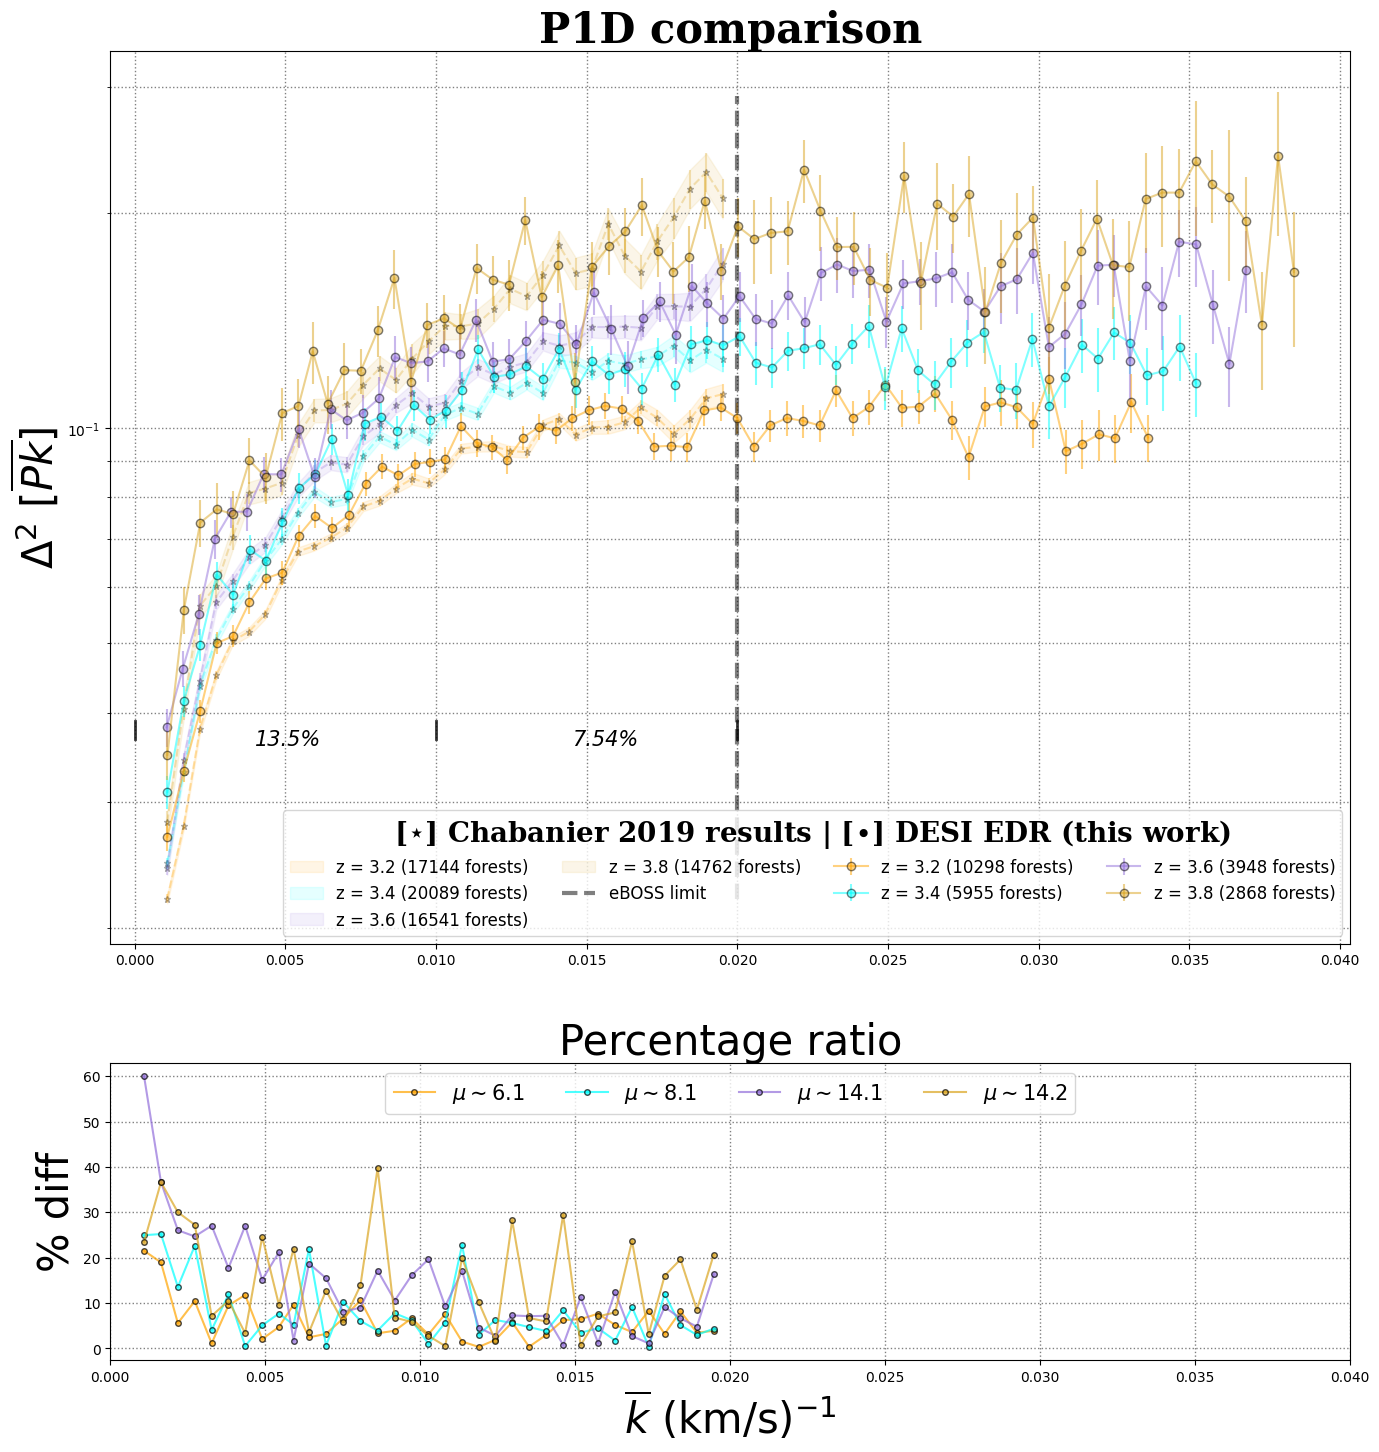

In [69]:
n1, n2 = ['P1D_eBOSS_Chabanier2019_results.fits','P1D_DESI_SC_vel_extent.fits.gz']


local_file1 = os.path.join(local_dir,n1)
p1d_file1 = pyfits.open(local_file1)
PS1 = Table.read(p1d_file1[1])
chunks1 = Table.read(p1d_file1[2])
    
local_file2 = os.path.join(local_dir,n2)
p1d_file2 = pyfits.open(local_file2)
PS2 = Table.read(p1d_file2[1])
chunks2 = Table.read(p1d_file2[2])
bines = 4 - 0
ini = 5
    
fig, axs = plt.subplots(2,1,figsize=(16,17), gridspec_kw={'height_ratios': [3,1]}, dpi = 100)
    
for a in range(bines+1):
    if (a==bines):
        axs[0].errorbar(k1,P1,yerr = er1, marker = 'none',
                     label = '',
                     markersize = 0,color = 'none', alpha = 0.0, mec ='none', linestyle = "-")
    else:
        binZ1 = (PS1['zbin'] == z_bin[ini+a])
        pl1 = PS1[binZ1]
        k1 = pl1['meank']
        P1 = (pl1['meanPk'] *  pl1['meank'])/np.pi
        er1 = (pl1['errorPk'] *  pl1['meank'])/np.pi
        fu_1 = ((er1)) + (P1)
        fl_1 = (P1) - ((er1))
        axs[0].errorbar(k1,P1,yerr = er1, marker = '*', 
                        label = '',
                        markersize = 5,color = qlor[ini+a], alpha = 0.3, mec ='k', linestyle = "--") 
        axs[0].fill_between(k1,fu_1,fl_1, alpha = 0.1,color = qlor[ini+a], 
                         label = lbl[ini+a]+' ('+str(int(chunks1['N_chunks'][a]))+ ' forests)')
        
        
    

cut = np.array([60,63,66,69,72,75,78,81,84])
        
for a in range(bines+1):
    if (a==bines):
        axs[0].errorbar(k1,P1,yerr = er1, marker = 'none', 
                     label = '',
                     markersize = 0,color = 'none', alpha = 0.0, mec ='none', linestyle = "-")
    else:
        binZ2 = (PS2['zbin'] == z_bin[ini+a])
        pl2 = PS2[binZ2]
        k2 = pl2['meank']
        P2 = (pl2['meanPk'] *  pl2['meank'])/np.pi
        er2 = (pl2['errorPk'] *  pl2['meank'])/np.pi
        k = k2[0:cut[a]+1]
        P = P2[0:cut[a]+1]
        er = er2[0:cut[a]+1]
        fu_2 = ((er2)) + (P2)
        fl_2 = (P2) - ((er2))
        fu_2 = fu_2[0:cut[a]+1]
        fl_2 = fl_2[0:cut[a]+1]
        axs[0].errorbar(k,P,yerr = er, marker = 'o',
                        label = lbl[ini+a]+' ('+str(int(chunks2['N_chunks'][a]))+ ' forests)',
                        markersize = 6, color = qlor[ini+a], alpha = 0.5, mec ='k', linestyle = "-")
        binZA = (PS1['zbin'] == z_bin[ini+a]) & (PS1['meank'] <= 2.02)
        plA = PS1[binZA]
        kA = plA['meank']
        PA = (plA['meanPk'] *  plA['meank'])/np.pi
        erA = (plA['errorPk'] *  plA['meank'])/np.pi
        fu_A = ((erA)) + (PA)
        fl_A = (PA) - ((erA))
        EP = abs((plA['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
   


lw_fl = 3
lc_fl = 'black'
a_fl = 0.5


axs[0].axvline(0.020,ymin = 0.05,ymax= 0.95, c=lc_fl, alpha=a_fl, linewidth = lw_fl, 
            label = 'eBOSS limit', linestyle = '--')    
axs[0].set_title(f'P1D comparison', weight='semibold', 
            style= 'normal', family = 'serif', size =30)
    
axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]', size = 30)
axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
axs[0].set_xticks([0.000, 0.005, 0.010, 0.015,0.020, 0.025, 0.030,0.035,0.040])
axs[0].set_yscale('log')
    
txt_prop = {'size' :12}
txt_propT = {'style' : 'normal', 'family' : 'serif', 'size' :20, 'weight':'semibold'}
S = r'[$\star$]'
B = r'[$\bullet$]'
axs[0].legend(loc = 'lower right', ncol= 4, prop = txt_prop,
                title_fontproperties=txt_propT,
                title=f'{S} Chabanier 2019 results | {B} DESI EDR (this work)',fancybox=True)
axs[0].axvline(0,ymin =0.23,ymax= 0.25, c=lc_fl, alpha=0.8, linewidth = 2)
axs[0].axvline(0.010,ymin =0.23,ymax= 0.25, c=lc_fl, alpha=0.8, linewidth = 2)
axs[0].axvline(0.020,ymin =0.23,ymax= 0.25, c=lc_fl, alpha=0.8, linewidth = 2)



TrB = 0
TrH = 35



AVE_ERROR = []
Pt1 = []
Pt2 = []
        
for a in range(bines):
    binZ1 = (PS1['zbin'] == z_bin[ini+a]) & (PS1['meank'] <= 0.02) 
    pl1 = PS1[binZ1]
        
    binZ2 = (PS2['zbin'] == z_bin[ini+a]) & (PS2['meank'] <= 0.02)
    pl2 = PS2[binZ2]
    EP = abs((pl2['meanPk'][TrB:TrH]-pl1['meanPk'][TrB:TrH])/pl1['meanPk'][TrB:TrH])*100
    
    Pt1.append(np.mean(np.array(EP[0:18])))
    Pt2.append(np.mean(np.array(EP[18:35])))
    
    
    ave_flab = np.mean(np.array(EP[TrB:TrH]))
    axs[1].plot(k2[TrB:TrH],EP[TrB:TrH], marker = '.', markersize = 8,
                color = qlor[ini+a], alpha = 0.7,
                label = r'$\mu\sim$'+str(round(ave_flab,1)),mec ='k')
    AVE_ERROR.append(ave_flab)
        
AVE_ERROR = np.array(AVE_ERROR)        
Pt1 = np.array(Pt1)       
Pt2 = np.array(Pt2)        
        
axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
axs[1].set_ylabel('% diff', size = 30)
axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
axs[1].legend(loc = 'upper center', ncol=7, fontsize = 15)
axs[1].set_xticks([0.000, 0.005, 0.010, 0.015,0.020, 0.025, 0.030,0.035,0.040])
plt.title(f'Percentage ratio', size = 30)
print(f'Prepared for mean file from Corentin...')
print(f'Average difference {round(np.mean(AVE_ERROR),2)}%')     
print(f'Average difference Pt1 {round(np.mean(Pt1),2)}%')
print(f'Average difference Pt2 {round(np.mean(Pt2),2)}%') 


text_rot = 0.0     


axs[0].text(0.004, 0.036, f'{round(np.mean(Pt1),2)}%', fontsize = 15, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique') 
axs[0].text(0.0145, 0.036, f'{round(np.mean(Pt2),2)}%', fontsize = 15, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique') 


In [3]:
local_file1 = os.path.join(local_dir,'P1D_DESI_SV13CorentinDelts.fits.gz')
p1d_file1 = pyfits.open(local_file1)
PS1 = Table.read(p1d_file1[1])
chunks1 = Table.read(p1d_file1[2])
chunks1

<Table length=21>
 z_min   z_max   k_min   k_max  N_chunks
float64 float64 float64 float64 float64 
------- ------- ------- ------- --------
    2.1     2.3    0.02   2.034  11036.0
    2.3     2.5    0.02   2.034   6377.0
    2.5     2.7    0.02   2.034   4221.0
    2.7     2.9    0.02   2.034   3087.0
    2.9     3.1    0.02   2.034   1944.0
    3.1     3.3    0.02   2.034   1147.0
    ...     ...     ...     ...      ...
    4.9     5.1    0.02   2.034      3.0
    5.1     5.3    0.02   2.034      2.0
    5.3     5.5    0.02   2.034      0.0
    5.5     5.7    0.02   2.034      0.0
    5.7     5.9    0.02   2.034      0.0
    5.9     6.1    0.02   2.034      0.0
    6.1     6.3    0.02   2.034      0.0

Prepared for mean file from Corentin...
Average difference 4.69%


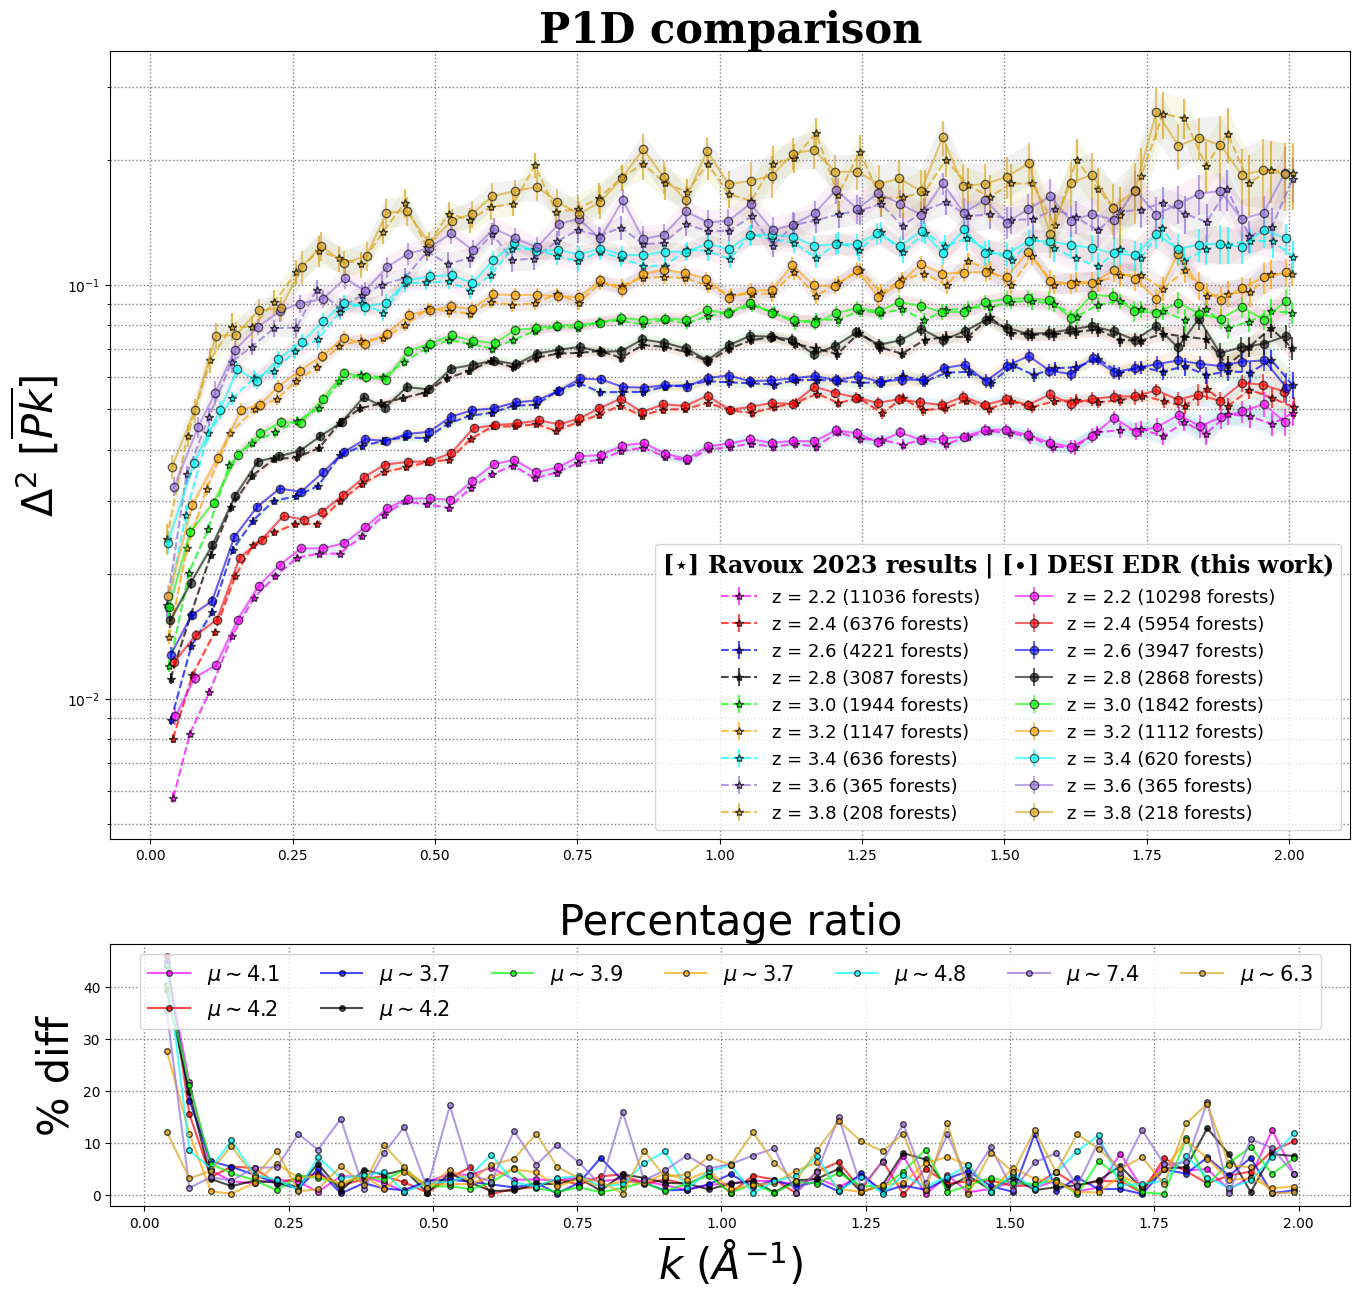

In [214]:
#P1D_DESI_SV1-3_Standard_lambunits.fits.gz
#4.04
#4.95
error_compar2_lambda('mean_Pk1d_fit_snr_medians.fits.gz','P1D_DESI_SC.fits.gz',
              0,9,3,1,16,15,
              'Ravoux 2023 results','DESI EDR (this work)','P1D comparison')

In [63]:
def systematics(n1,n2,ini,fin,Hr1,Hr2,Wf,Hf,title):

    while (ini>13):
        ini = input('Must be minor than 13:')
        ini = int(ini)
        
    local_file1 = os.path.join(local_dir,n1)
    PS1=Table.read(local_file1)
    
    print(n1)
    bines = fin - ini
    
    fig, axs = plt.subplots(len(n2),1,figsize=(Wf,Hf),gridspec_kw={'hspace':0.3}, dpi = 100)#, gridspec_kw={'height_ratios': [Hr1, Hr2]}
    
    marks = ['o','*','s']
    
    boundary = 0
    
    if (((np.char.find(title, "DESI", start=0, end=None))>=0)):
        boundary = 2.05
    else:
        boundary = 0.02
  
    for h in range(len(n2)):
        
        print(n2[h])
        local_file2 = os.path.join(local_dir,n2[h])
        PS2=Table.read(local_file2)
        
        if ((np.char.find(n2[h], "DLA", start=0, end=None))>=0):
            budget_name = "Skipping DLA systems masking"
        elif ((np.char.find(n2[h], "BAL", start=0, end=None))>=0):
            budget_name = "Including BAL quasars on the computation"
        elif ((np.char.find(n2[h], "Sky", start=0, end=None))>=0):
            budget_name = "Skipping Skylines masking"
        
        
        for a in range(bines):
            binZ1 = (PS1['zbin'] == z_bin[ini+a]) & (PS1['meank'] <= boundary)
            pl1 = PS1[binZ1]
            k1 = pl1['meank']
            P1 = (pl1['meanPk'] *  pl1['meank'])/np.pi
            er1 = (pl1['errorPk'] *  pl1['meank'])/np.pi
            fu_1 = ((er1)) + (P1)
            fl_1 = (P1) - ((er1))
            
            binZ2 = (PS2['zbin'] == z_bin[ini+a]) & (PS1['meank'] <= boundary)
            pl2 = PS2[binZ2]
            k2 = pl2['meank']
            P2 = (pl2['meanPk'] *  pl2['meank'])/np.pi
            er2 = (pl2['errorPk'] *  pl2['meank'])/np.pi
            fu_2 = ((er2)) + (P2)
            fl_2 = (P2) - ((er2))
            EP = abs((pl2['meanPk']-pl1['meanPk'])/pl1['meanPk'])*100
            
            axs[h].plot(k2,EP, marker = marks[h], markersize = 8,color = qlor[ini+a], alpha = 0.7, mec ='k')
            
        
        axs[h].set_ylabel('% diff', size = 30)
        axs[h].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
        axs[h].set_title(f'{budget_name}', size = 20)
        txt_prop = {'style' : 'italic'}
        axs[h].legend(lbl[ini:fin],loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, prop = txt_prop)
        
        if (((np.char.find(title, "DESI", start=0, end=None))>=0)):
            axs[h].set_xticks([0.0,0.25,0.50,0.75,1.0,1.25,1.50,1.75,2.0])
            axs[h].set_xlim([0.0,2.0])
        else:
            axs[h].set_xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
            axs[h].set_xlim([0.0,0.02])
         
        if ((h==2) and ((np.char.find(title, "BOSS", start=0, end=None))>=0)):
            axs[h].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
            print('eBOSS MODE')
            
        if ((h==1) and ((np.char.find(title, "DESI", start=0, end=None))>=0)):
            axs[h].set_xlabel('$\overline{k}$ $(\AA^{-1})$', size = 30)
            print('DESI MODE')     
            
    #fig.suptitle(f'Systematics ratio: P1D measurement from {title} sample', weight='semibold', 
                #style= 'normal', family = 'serif', size =30)

P1D_DESI_Standard.fits.gz
P1D_DESI_BALsincu.fits.gz
P1D_DESI_Skynocor.fits.gz
DESI MODE


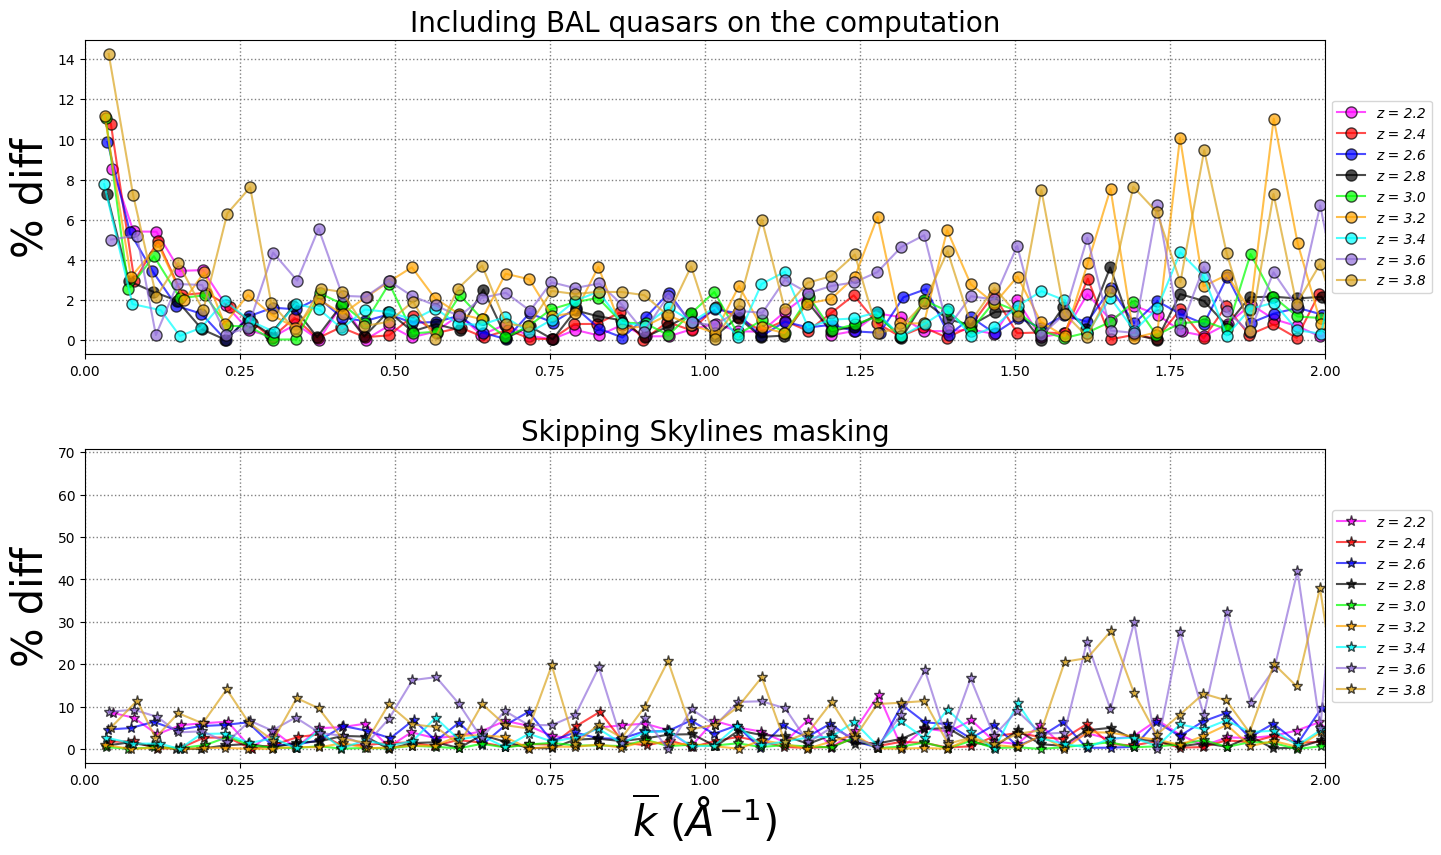

In [64]:
systematics('P1D_DESI_Standard.fits.gz',
                  ['P1D_DESI_BALsincu.fits.gz','P1D_DESI_Skynocor.fits.gz'],
                  0,9,3,1,16,9.4,'DESI EDR')

P1D_eBOSS_DR14_Standard-master.fits.gz
P1D_eBOSS_DR14_DLAnot_corrected.fits.gz
P1D_eBOSS_DR14_BALincluded.fits.gz
P1D_eBOSS_DR14_SkyLines_included.fits.gz
eBOSS MODE


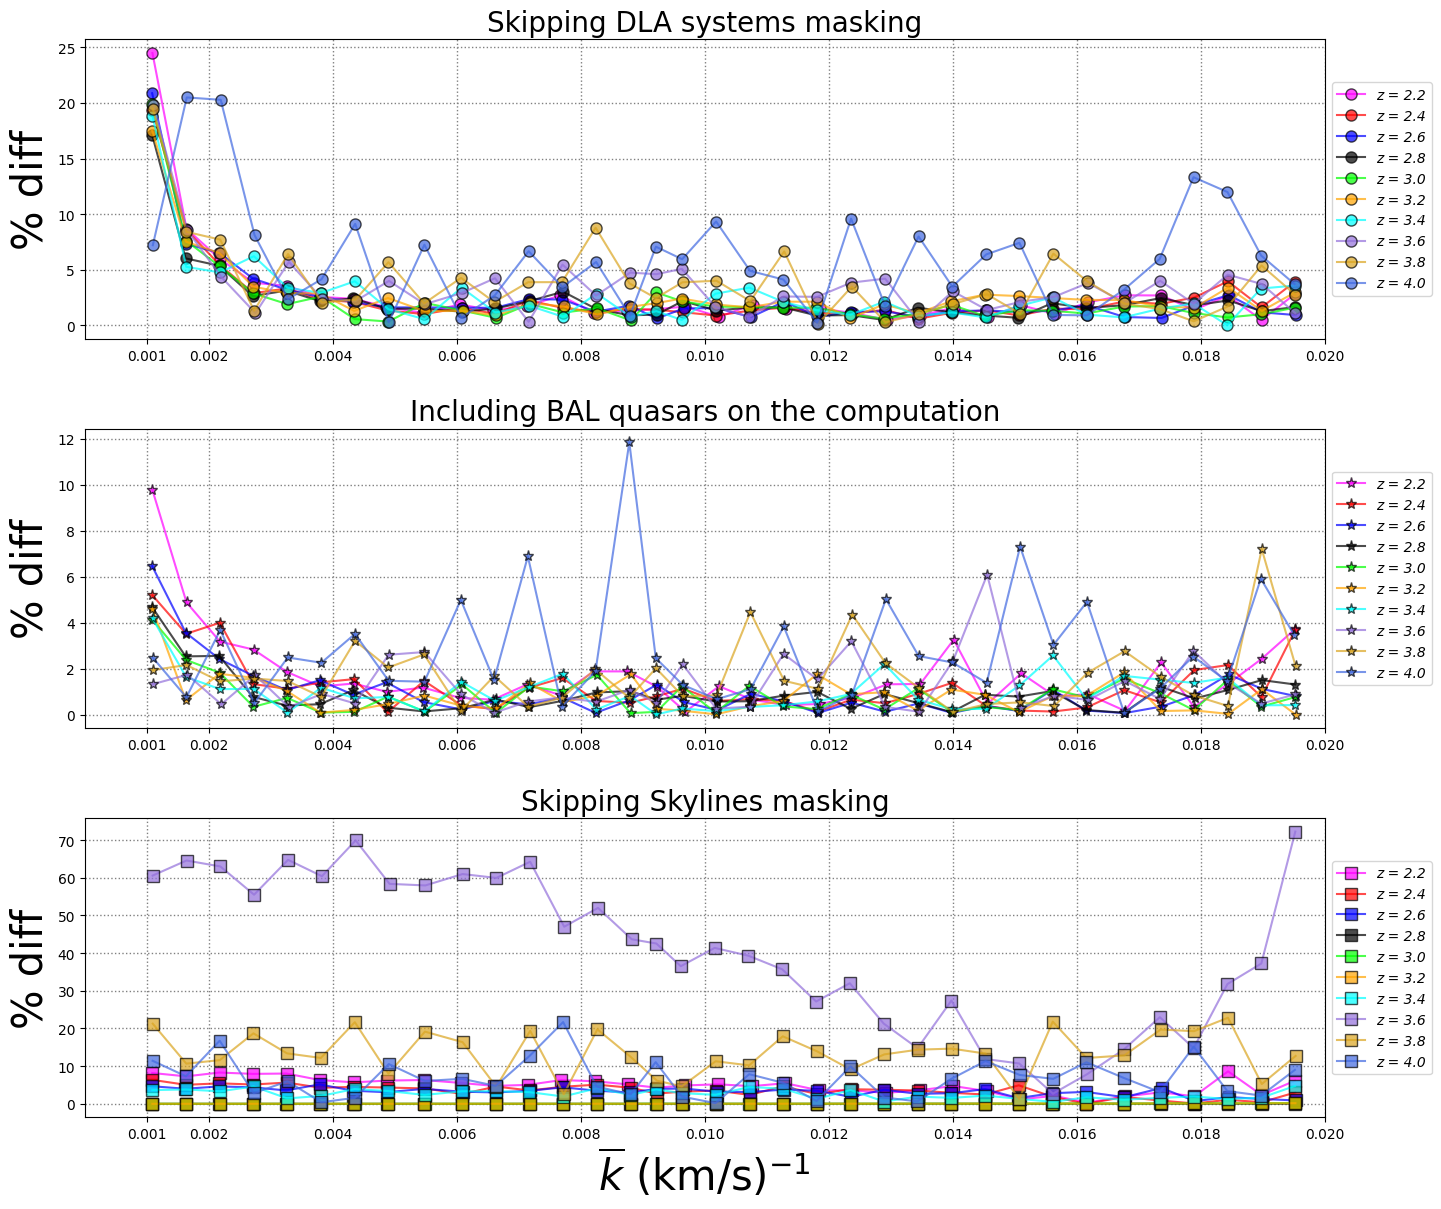

In [65]:
systematics('P1D_eBOSS_DR14_Standard-master.fits.gz',
                  ['P1D_eBOSS_DR14_DLAnot_corrected.fits.gz','P1D_eBOSS_DR14_BALincluded.fits.gz',
                   'P1D_eBOSS_DR14_SkyLines_included.fits.gz'],
                  0,10,3,1,16,14,'eBOSS DR14')

P1D_eBOSS_DR16_Standard-master.fits.gz
P1D_eBOSS_DR16_DLAnot_corrected.fits.gz
P1D_eBOSS_DR16_BALincluded.fits.gz
P1D_eBOSS_DR16_SkyLines_included.fits.gz
eBOSS MODE


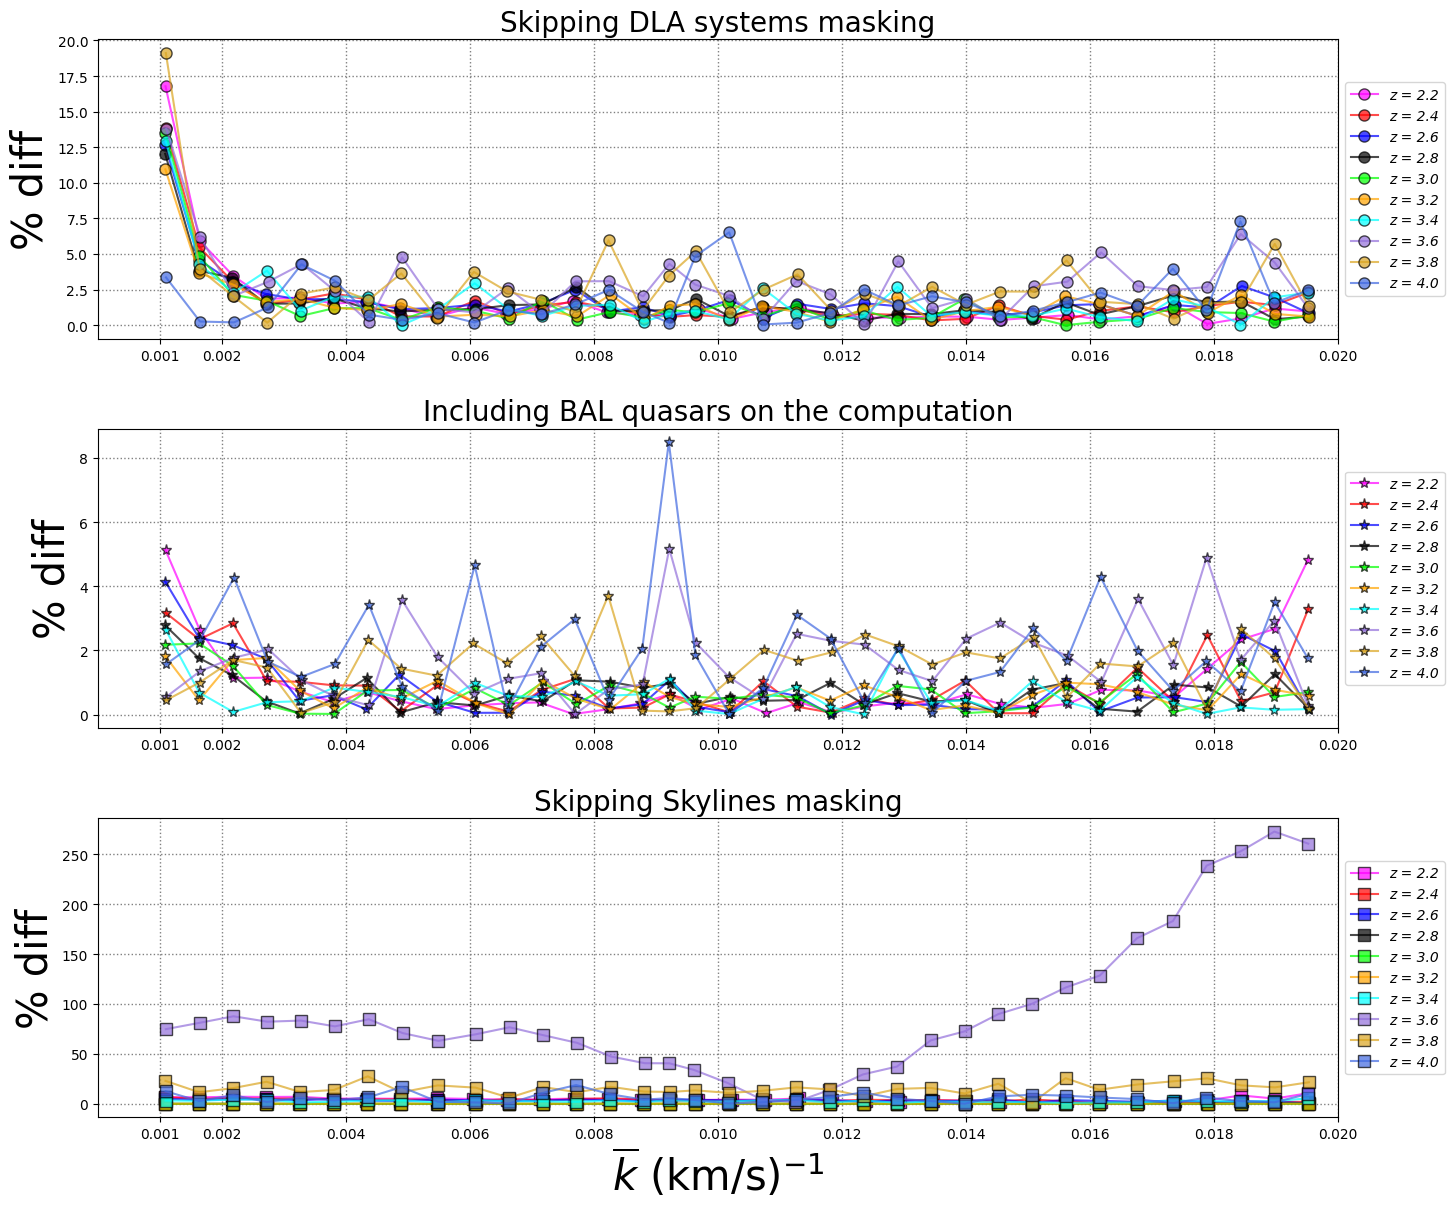

In [66]:
systematics('P1D_eBOSS_DR16_Standard-master.fits.gz',
                  ['P1D_eBOSS_DR16_DLAnot_corrected.fits.gz','P1D_eBOSS_DR16_BALincluded.fits.gz',
                   'P1D_eBOSS_DR16_SkyLines_included.fits.gz'],
                  0,10,3,1,16,14,'eBOSS DR16')

In [14]:
#systematics('P1D_DESI_SV1-3_Standard_lambunits.fits.gz',
                  #['P1D_DESI_SV1-3_BALincluded_lambunits.fits.gz',
                   #'P1D_DESI_SV1-3_SkyLines_included_lambunits.fits.gz'],
                  #0,9,3,1,15,13,'DESI')

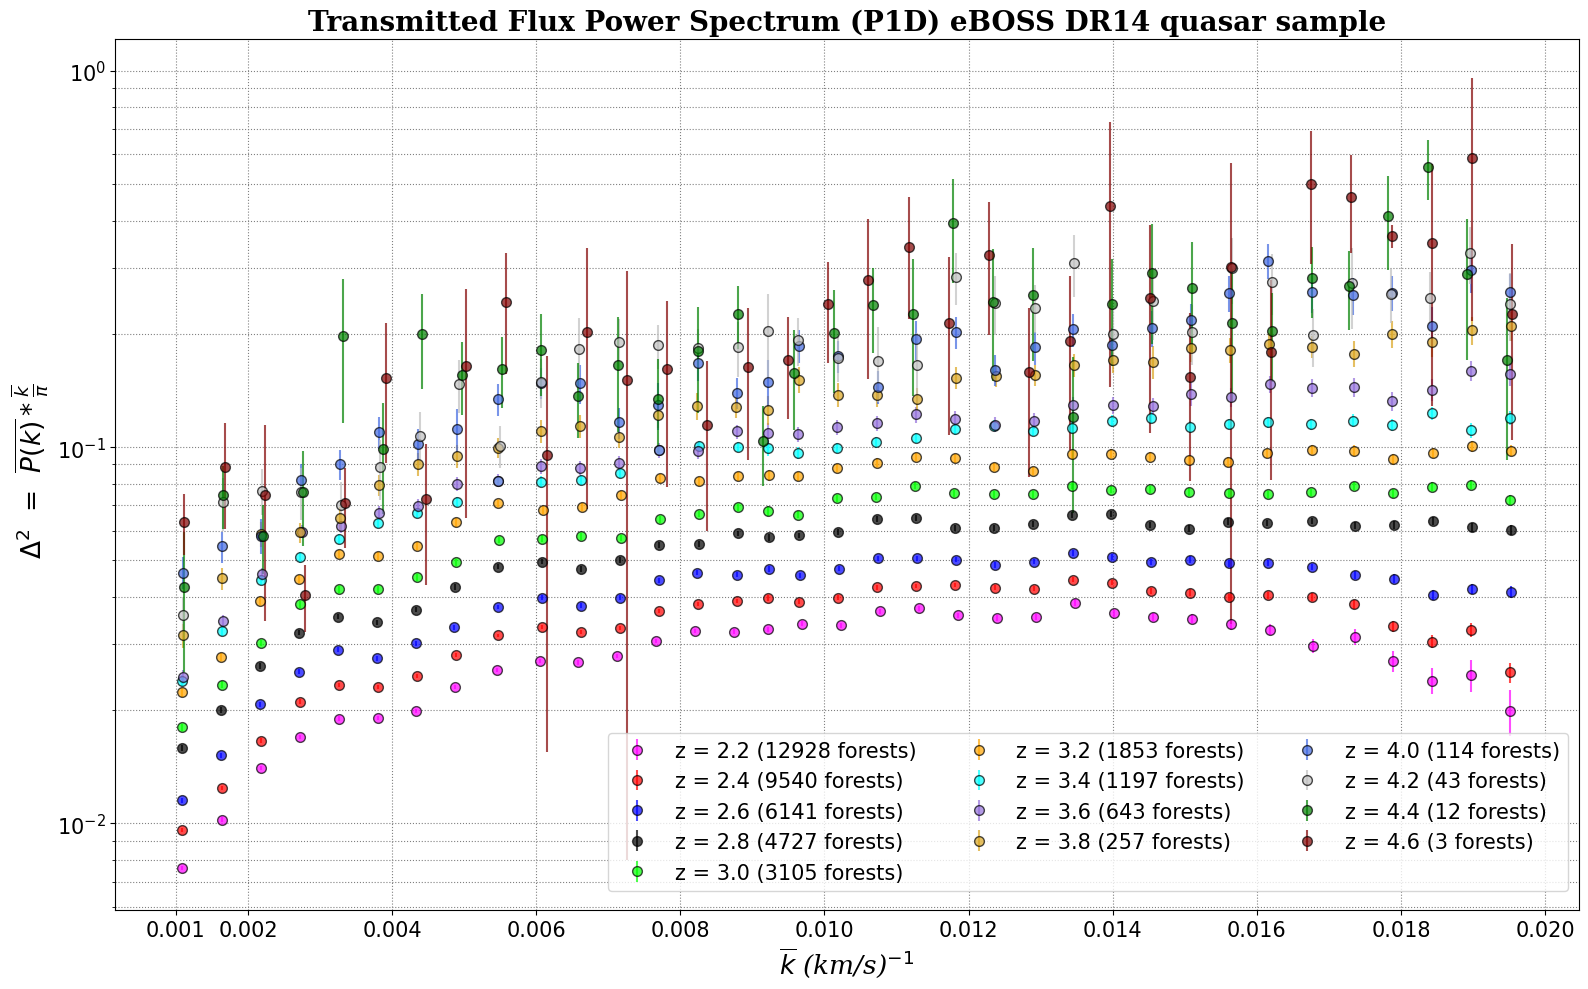

Number of forest 40563


In [15]:
p1d_HQv('P1D_eBOSS_DR14_Standard-master.fits.gz',0,13,0.7,'o',7,'none','eBOSS DR14',100,16,10,19,15,20,3)

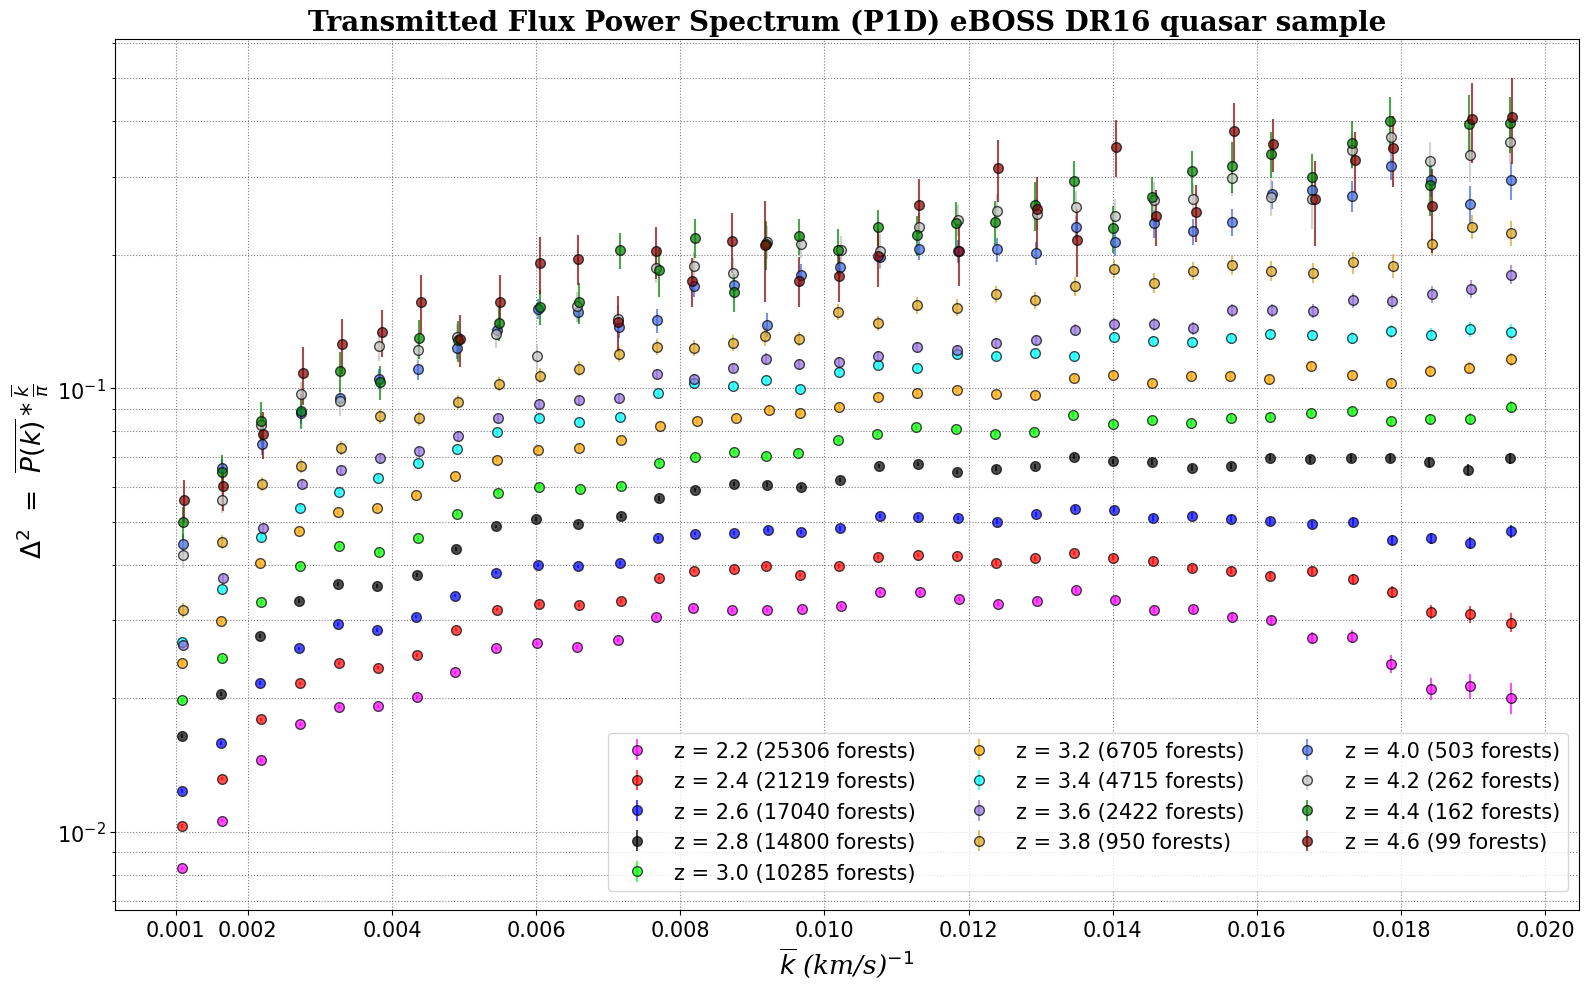

Number of forest 104468


In [16]:
p1d_HQv('P1D_eBOSS_DR16_Standard-v4.fits.gz',0,13,0.7,'o',7,'none','eBOSS DR16',100,16,10,19,15,20,3)

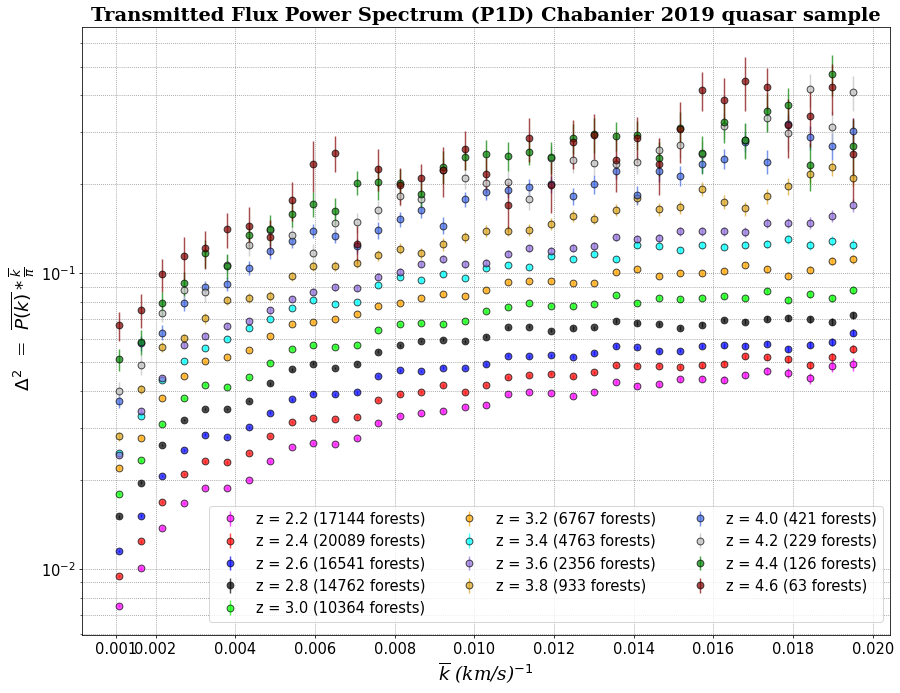

Number of forest 94558


In [17]:
p1d_HQv('P1D_eBOSS_Chabanier2019_results.fits',0,13,0.7,'o',7,'none','Chabanier 2019',70,13,10,19,15,20,3)

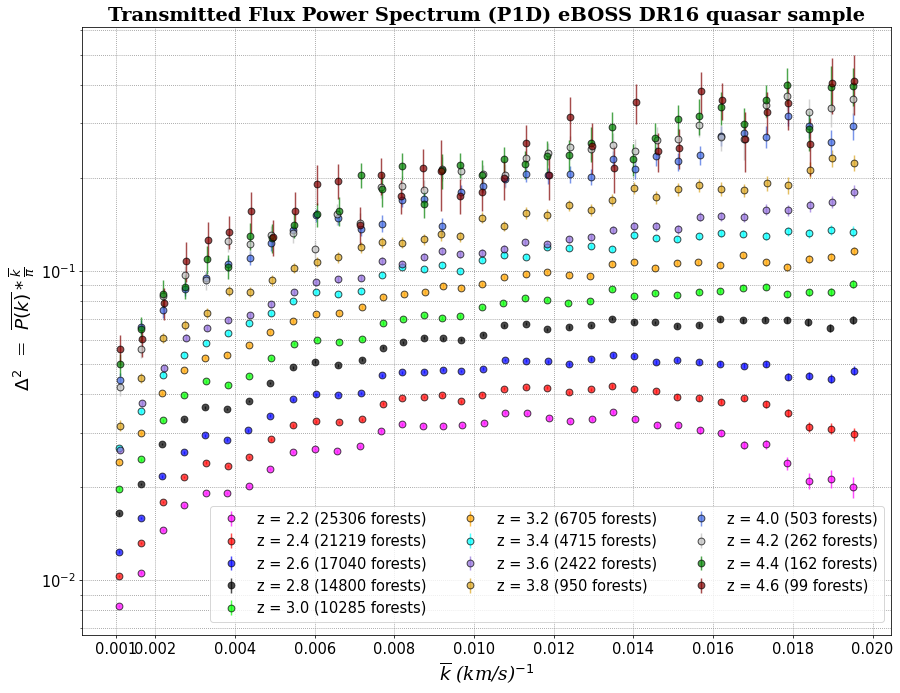

Number of forest 104468


In [18]:
p1d_HQv('P1D_eBOSS_DR16_Standard-v4.fits.gz',0,13,0.7,'o',7,'none','eBOSS DR16',70,13,10,19,15,20,3)

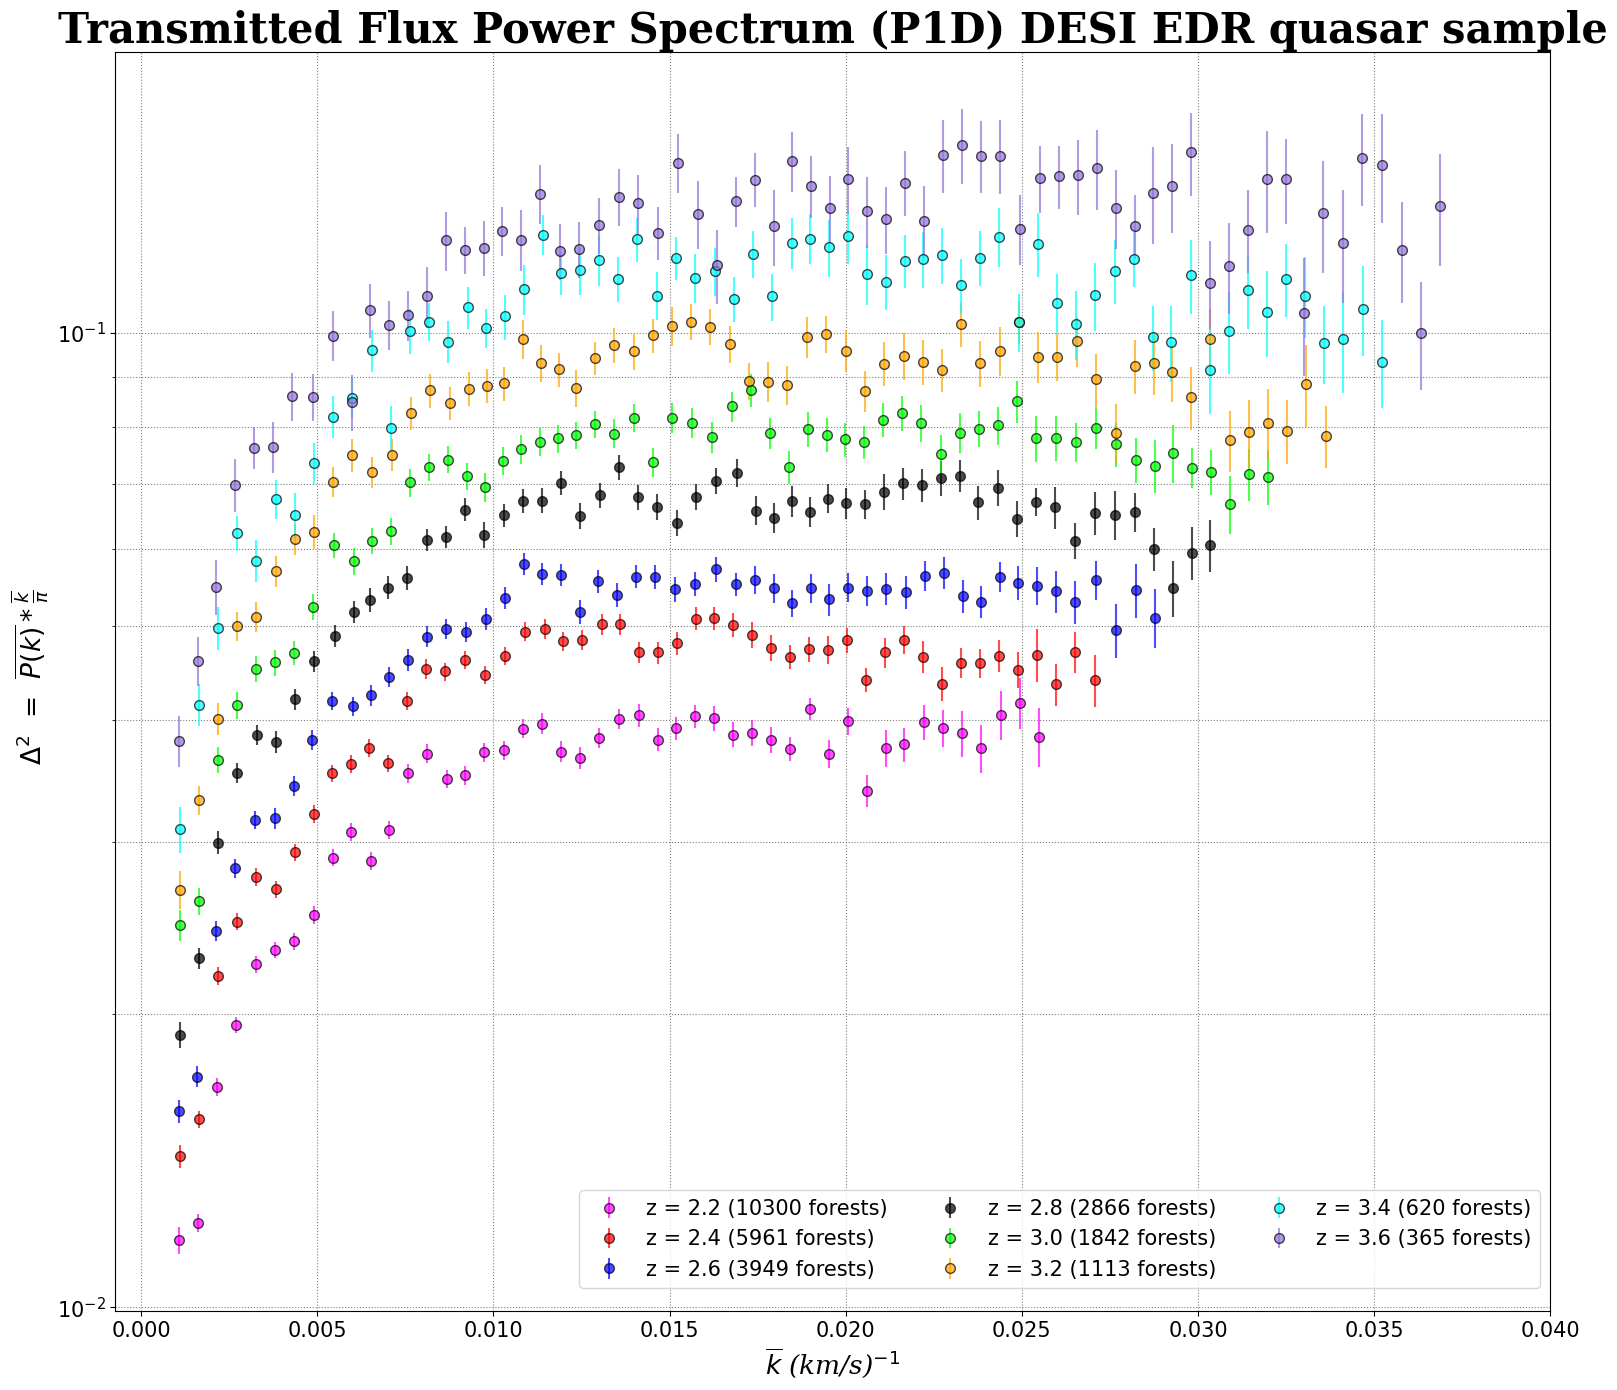

Number of forest 27016


In [15]:
p1d_HQv('P1D_DESI_SV1-3_Standard_velunits_extended.fits.gz',0,8,0.7,'o',7,'none','DESI EDR',100,16,14,19,15,30,3)

In [9]:
p1d_HQl('DESIpos/P1D_DESI_SV1-3_Standard_lambunits.fits.gz',0,11,0.7,'o',7,'none','DESI EDR',70,16,9.6,19,15,20,3)

NameError: name 'p1d_HQl' is not defined

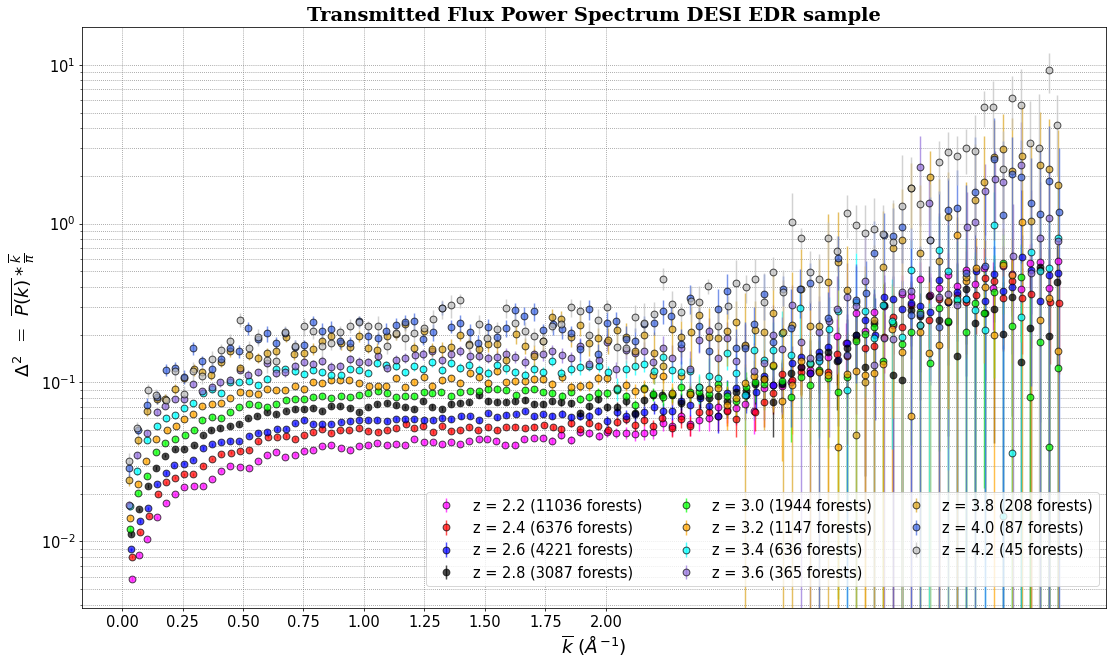

Number of forest 29152


In [23]:
p1d_HQl('mean_Pk1d_fit_snr_medians.fits.gz',0,11,0.7,'o',7,'none','DESI EDR',70,16,9.6,19,15,20,3)

In [ ]:
#P1D_DESI_SV1-3_Standard_velunits.fits.gz
#P1D_DESI_SV1-3_SkyLines_included_velunits.fits.gz
#P1D_DESI_SV1-3_BALincluded_velunits.fits.gz
#P1D_eBOSS_Chabanier2019_results.fits
#P1D_eBOSS_DR14_Standard-v4.fits.gz
#P1D_eBOSS_DR16_Standard-v4.fits.gz
#P1D_DESI_SV1-3_Standard_velunits.fits.gz

plotter_compar(2,0,4)

In [ ]:
fig = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1], 'wspace':0},figsize=(20,10),dpi=200)

ini = 0


p1d_file = pyfits.open(local_dir+'/P1D_eBOSS_DR14_Standard-v4.fits.gz')
PS = Table.read(p1d_file[1])
chunks = Table.read(p1d_file[2])
plt.subplot(1, 2, 1)
for a in range(13):
    
    binZ = (PS['zbin'] == z_bin[ini+a])
    pl = PS[binZ]
    k = pl['meank']
    P = (pl['meanPk'] *  pl['meank'])/np.pi
    er = (pl['errorPk'] *  pl['meank'])/np.pi
        
    plt.errorbar(k , P , yerr = er, marker = 'o', 
                 label = lbl[ini+a]+' ('+str(int(chunks['N_chunks'][a]))+ ' forests)',
                 markersize = 6, color = qlor[ini+a],alpha = 0.8, mec = 'k', linestyle = 'none')
                        
plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique',
           family = 'serif', size = 20)          
plt.xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = 20)
plt.yscale('log')
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
plt.legend(loc = 'lower right',bbox_to_anchor=(1, 0.010), ncol=3, fontsize = 12.5)
plt.xticks([0.00, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020],fontsize = 15)
plt.yticks([0.01,0.10],fontsize = 15)






p1d_file = pyfits.open(local_dir+'/P1D_eBOSS_DR16_Standard-v4.fits.gz')
PS = Table.read(p1d_file[1])
chunks = Table.read(p1d_file[2])
plt.subplot(1, 2, 2)
for a in range(13):
    
    binZ = (PS['zbin'] == z_bin[ini+a])
    pl = PS[binZ]
    k = pl['meank']
    P = (pl['meanPk'] *  pl['meank'])/np.pi
    er = (pl['errorPk'] *  pl['meank'])/np.pi
        
    plt.errorbar(k , P , yerr = er, marker = 'o', 
                 label = lbl[ini+a]+' ('+str(int(chunks['N_chunks'][a]))+ ' forests)',
                 markersize = 6, color = qlor[ini+a],alpha = 0.8, mec = 'k', linestyle = 'none')
                                
plt.xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = 20)
plt.yscale('log')
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
plt.legend(loc = 'lower right',bbox_to_anchor=(1, 0.010), ncol=3, fontsize = 12.5)
plt.xticks([0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020],fontsize = 15)
plt.yticks([0.01,0.1],fontsize = 0)


#sharey=True

plt.show()

In [3]:
local_dirC="/home/colgoat/Jupyter/"
file="p1d_measurement_DESI.txt"
local_file = os.path.join(local_dirC,file)


df = pd.read_csv(file,delim_whitespace=True, skiprows=0)
df

#Z         K   K*PK/PI  K*ERR/PI      STAT  SYST_TOT  SYST_Noise   
0    2.2  0.040581  0.004469  0.000641  0.000115  0.000631    0.000004  \
1    2.2  0.069960  0.006932  0.000571  0.000107  0.000561    0.000008   
2    2.2  0.104242  0.009343  0.000473  0.000161  0.000445    0.000011   
3    2.2  0.143708  0.012514  0.000435  0.000200  0.000387    0.000016   
4    2.2  0.182074  0.016156  0.000490  0.000244  0.000425    0.000020   
..   ...       ...       ...       ...       ...       ...         ...   
463  3.8  1.815434  0.152554  0.019074  0.016133  0.010175    0.000790   
464  3.8  1.853467  0.131726  0.018261  0.015702  0.009324    0.000856   
465  3.8  1.891987  0.164872  0.023998  0.020794  0.011980    0.000927   
466  3.8  1.929938  0.179444  0.023909  0.019643  0.013630    0.001009   
467  3.8  1.968311  0.138842  0.024271  0.021475  0.011309    0.001091   

         SYST_PSF  SYST_Resolution  SYST_Sideband  SYST_Lines  SYST_DLA   
0    1.459340e-07         0.000022       0.000000    0.000095  0.000003  \
1    6.482761e-07         0.000032       0.000069    0.000141  0.000005   
2    1.888647e-06         0.000040       0.000034    0.000183  0.000007   
3    4.696170e-06         0.000051       0.000057    0.000236  0.000009   
4    9.638198e-06         0.000063       0.000184    0.000299  0.000011   
..            ...              ...            ...         ...       ...   
463  8.851239e-03         0.003423       0.003318    0.000146  0.000250   
464  8.053201e-03         0.003121       0.003183    0.000022  0.000218   
465  1.055092e-02         0.004098       0.003474    0.000108  0.000274   
466  1.200714e-02         0.004674       0.003943    0.000268  0.000300   
467  9.815327e-03         0.003830       0.003681    0.000331  0.000235   

     SYST_Continuum  SYST_DLAcompleteness  
0      6.964419e-07              0.000623  
1      1.652704e-06              0.000538  
2      3.073858e-06              0.000402  
3      5.329996e-06              0.000296  
4      8.368688e-06              0.000231  
..              ...                   ...  
463    1.157097e-03              0.000653  
464    1.050087e-03              0.000570  
465    1.371843e-03              0.000717  
466    1.556421e-03              0.000784  
467    1.268123e-03              0.000616  

[468 rows x 14 columns]

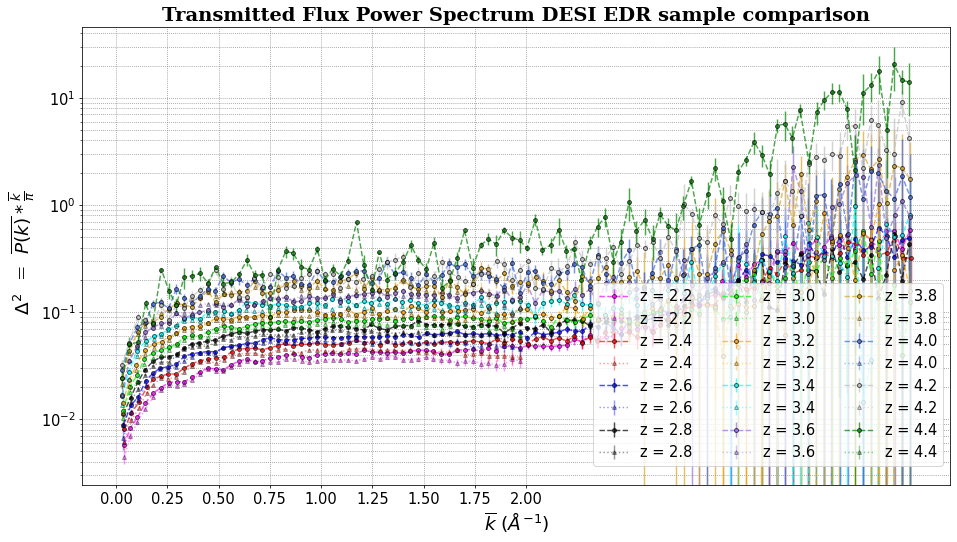

Filename: /home/colgoat/TFPS/mean_Pk1d_fit_snr_medians.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU    134   2142R x 63C   ['D', 'K', 'K', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']   
  2                1 BinTableHDU     20   21R x 5C   [D, D, D, D, D]   


In [4]:
n,ini,fin,pha,mark,ms,ls,survey,DPI,w,h,AlS,LS,TS,Nc = 'mean_Pk1d_fit_snr_medians.fits.gz',0,12,0.7,'o',7,'--','DESI EDR',70,16,8.5,19,15,20,3

p1d_file = pyfits.open(local_dir+'/'+n)
PS = Table.read(p1d_file[1])


plt.figure(figsize=(w,h),dpi=int(DPI))

bines = fin - ini
    
N_forest = []
    
for a in range(bines):
    binZ = (PS['zbin'] == z_bin[ini+a])
    pl = PS[binZ]
    k = pl['meank']
    P = (pl['meanPk'] *  pl['meank'])/np.pi
    er = (pl['errorPk'] *  pl['meank'])/np.pi
    plt.errorbar(k , P , yerr = er, marker = mark,
                 label = lbl[ini+a],
                 markersize = 4, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
    
    binZC = (df['#Z'] == z_bin[ini+a])
    plC = df[binZC]
    kC = plC['K']
    PC = plC['K*PK/PI'] - (plC['SYST_PSF']* plC['K']/np.pi)
    erC = plC['K*ERR/PI']
    plt.errorbar(kC , PC , yerr = erC, marker = "^",
                 label = lbl[ini+a],
                 markersize = 4, color = qlor[ini+a],alpha = 0.4, mec = 'k', linestyle = ':')
    
                     
plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique', family = 'serif', size = AlS)
plt.xlabel('$\overline{k}$ $(\AA^{-1})$',style = 'oblique', family = 'serif', size = AlS)
plt.yscale('log')
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.025), ncol=Nc, fontsize = LS)
plt.xticks([0.0,0.25,0.50,0.75,1.0,1.25,1.50,1.75,2.0],fontsize = 15)
plt.yticks(fontsize = 15)
plt.title(f'Transmitted Flux Power Spectrum {str(survey)} sample comparison', weight='semibold',
          style= 'normal', family = 'serif', size =TS)
                
plt.show()

a = PS['zbin']==2.2

PS[a]

p1d_file.info()

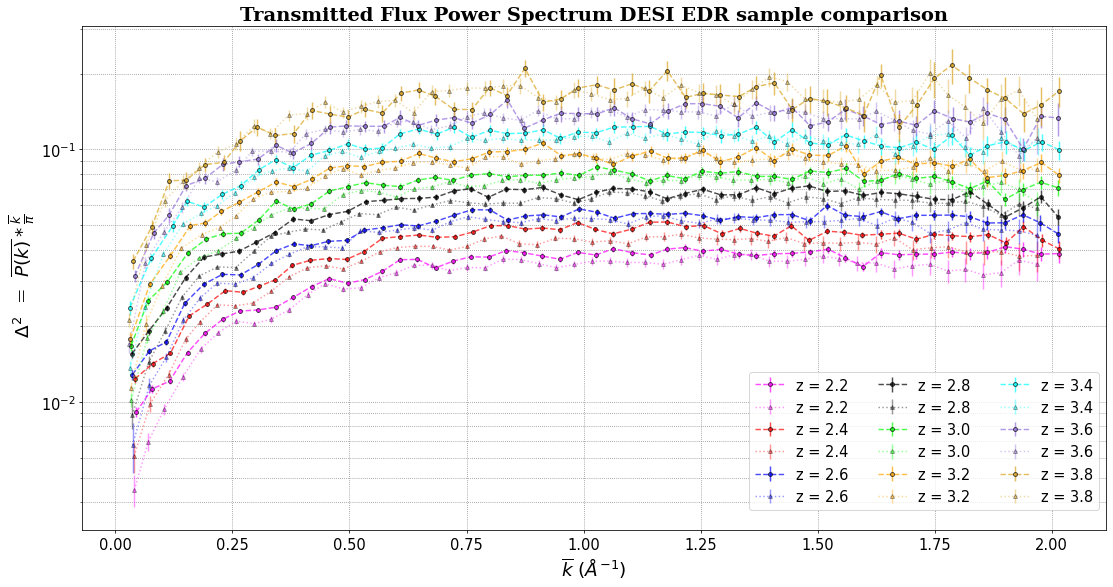

<Table length=53>
  zbin  index_zbin   N   ...    maxPk_noraw        medianPk_noraw  
float64   int64    int64 ...      float64             float64      
------- ---------- ----- ... ------------------ -------------------
    2.2          0  4503 ...   3.41903844138089 0.13450992126399702
    2.2          0  8312 ...  3.620640945313864 0.12050235576239791
    2.2          0  6077 ... 3.6099174591832965 0.12669985582668591
    2.2          0  6624 ... 2.0895516155244964 0.12552826352744761
    2.2          0  7388 ...  3.609939585128768    0.12628251685113
    2.2          0  6019 ... 3.6713141541586998 0.12627962571701007
    ...        ...   ... ...                ...                 ...
    2.2          0  6916 ...  12.75944299549668  0.4702491569925974
    2.2          0  6751 ... 13.824993439592715  0.4784814683642945
    2.2          0  6679 ... 14.733279032269667   0.512917905284649
    2.2          0  7115 ... 15.247212523037327   0.543871267323127
    2.2          0  6188 ... 10.196071779140132   0.577263841153937
    2.2          0  7423 ...   16.6174143623549  0.6095448972082983
    2.2          0  6550 ...  17.49033064254597  0.6529892835178934

In [60]:
#p1d_HQl('P1D_DESI_SV1-3_Standard_lambunits.fits.gz',0,11,0.7,'o',7,'none','DESI EDR',70,16,9.6,19,15,20,3)

n,ini,fin,pha,mark,ms,ls,survey,DPI,w,h,AlS,LS,TS,Nc = '/DESIpos/P1D_DESI_SV1-3_Standard_lambunits.fits.gz',0,9,0.7,'o',7,'--','DESI EDR',70,16,8.5,19,15,20,3

p1d_file = pyfits.open(local_dir+'/'+n)
PS = Table.read(p1d_file[1])


plt.figure(figsize=(w,h),dpi=int(DPI))

bines = fin - ini
    
N_forest = []
    
for a in range(bines):
    binZ = (PS['zbin'] == z_bin[ini+a])
    pl = PS[binZ]
    k = pl['meank']
    P = (pl['meanPk'] *  pl['meank'])/np.pi
    er = (pl['errorPk'] *  pl['meank'])/np.pi
    plt.errorbar(k , P , yerr = er, marker = mark,
                 label = lbl[ini+a],
                 markersize = 4, color = qlor[ini+a],alpha = pha, mec = 'k', linestyle = ls)
    
    binZC = (df['#Z'] == z_bin[ini+a])
    plC = df[binZC]
    kC = plC['K']
    PC = plC['K*PK/PI'] - (plC['SYST_PSF']* plC['K']/np.pi)
    erC = plC['K*ERR/PI']
    plt.errorbar(kC , PC , yerr = erC, marker = "^",
                 label = lbl[ini+a],
                 markersize = 4, color = qlor[ini+a],alpha = 0.4, mec = 'k', linestyle = ':')
    
                     
plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique', family = 'serif', size = AlS)
plt.xlabel('$\overline{k}$ $(\AA^{-1})$',style = 'oblique', family = 'serif', size = AlS)
plt.yscale('log')
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.025), ncol=Nc, fontsize = LS)
plt.xticks([0.0,0.25,0.50,0.75,1.0,1.25,1.50,1.75,2.0],fontsize = 15)
plt.yticks(fontsize = 15)
plt.title(f'Transmitted Flux Power Spectrum {str(survey)} sample comparison', weight='semibold',
          style= 'normal', family = 'serif', size =TS)
                
plt.show()
a = PS['zbin']==2.2

PS[a]

In [5]:
p1d_file = pyfits.open(local_dir+'/'+'DESIedr_Fincat_SinBAL.fits')
PS = Table.read(p1d_file[1])
p1d_file.info()
PS

Filename: /home/colgoat/TFPS/DESIedr_Fincat_SinBAL.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU    292   24743R x 105C   ['K', 'D', 'D', 'K', '6A', 'J', 'D', 'D', '4A', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'D', 'D', 'D', 'D', 'D', 'I', 'K', 'K', 'K', 'I', 'E', 'K', 'K', 'K', 'K', 'K', 'K', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'K', '3A', '4A', 'J', '5E', 'E', 'E', 'E', 'E', 'J', '5E', '5E', '5E', '5E', 'E', 'E', 'J', '17E', '17E', '17E', '17E', 'E', 'E', 'J', '5E', '5E', '5E', '5E', 'E', 'E', 'J', '17E', '17E', '17E', '17E', 'B', 'D', 'D', 'K', 'D', 'D', '6A', 'D']   


<Table length=24743>
     TARGETID      ...       SNR_CIV      
                   ...                    
      int64        ...       float64      
------------------ ... -------------------
 39627126193784363 ...  0.8195935774921809
 39627131495384271 ...  0.7660470114283564
 39627131507969517 ...  0.8932599670963901
 39627131507970322 ...  1.9225935759093555
 39627136847319542 ...  20.436907698978683
 39627136855706167 ...  0.5204190753516182
 39627142169889550 ...  1.0196894188175574
 39627142178276726 ...  0.8919810336337445
               ... ...                 ...
616094208591135565 ... 0.36215893181663145
616094211036414835 ... 0.41173899065090297
616094218166731008 ...  0.3584467365815738
616094218175120154 ... 0.31185241355253523
616094218179314456 ...  0.4032498440303089
616094218179314845 ...  0.3263936106489056
616094218187702398 ...   0.504323857635416
616094218191896647 ... 0.37662607832689926
616094220507152830 ...  0.3270850038196708

In [382]:
from astropy.table import vstack

In [383]:
def extrac_compac(name, rnag = 3):
    T1 = Table()
    T2 = Table()
    T3 = Table()
    for x in range(rnag):
        if (x==0):
            n = '/home/colgoat/Jupyter/delta_log/'+name+'rejection_log_'+'A'+'.fits.gz'
            file = pyfits.open(n)
            T1 = Table.read(file[1])
        if (x==1):
            n = '/home/colgoat/Jupyter/delta_log/'+name+'rejection_log_'+'B'+'.fits.gz'
            file = pyfits.open(n)
            T2 = Table.read(file[1])
        if (x==2):
            n = '/home/colgoat/Jupyter/delta_log/'+name+'rejection_log_'+'C'+'.fits.gz'
            file = pyfits.open(n)
            T3 = Table.read(file[1])
    FT = vstack(([T1,T2,T3]))
    return FT[FT['REJECTION_STATUS'] == 'accepted']
            

In [384]:
A = extrac_compac('DR14')
B = extrac_compac('DR16')
C = Table.read(pyfits.open('/home/colgoat/Jupyter/delta_log/DESIrejection_log.fits.gz')[1])
C

<Table length=24743>
FOREST_SIZE        REJECTION_STATUS              LOS_ID       ... NIGHT PETAL TILE
   int64                str33                    int64        ...  str1  str1 str1
----------- ------------------------------ ------------------ ... ----- ----- ----
        572  low SNR (0.02725962028015752) 616088955892269587 ...    --    --   --
        609  low SNR (0.08497492736557803)  39628203593041814 ...    --    --   --
        587   low SNR (0.6270963542729197)  39628220856795296 ...    --    --   --
        561   low SNR (0.2832340538287662)  39628215106406533 ...    --    --   --
        555   low SNR (0.9198829792773809)  39628226602992551 ...    --    --   --
        254  low SNR (0.07468066532492787)  39628209347629842 ...    --    --   --
        576   low SNR (0.6276664131606142)  39628226602995860 ...    --    --   --
        570   low SNR (0.4301472697834277)  39628215114793309 ...    --    --   --
        440   low SNR (0.3482022805567956)  39628215110600413 ...    --    --   --
        447  low SNR (0.10696926683658425)  39628232336610395 ...    --    --   --
        182 low SNR (-0.07567961208532109)  39628238057638279 ...    --    --   --
        255   low SNR (0.5228101238850232)  39628226628161188 ...    --    --   --
        633   low SNR (0.5771689859420309)  39628220877768181 ...    --    --   --
        558   low SNR (0.5531604246855427)  39628215139960759 ...    --    --   --
        ...                            ...                ... ...   ...   ...  ...
        619                       accepted  39627190811233322 ...    --    --   --
        585                       accepted  39627196276411744 ...    --    --   --
        207                       accepted  39627179914429897 ...    --    --   --
        719                       accepted  39627207244516623 ...    --    --   --
        548                       accepted  39627218254564631 ...    --    --   --
        632                       accepted  39627185362829609 ...    --    --   --
        190                       accepted  39627218258757714 ...    --    --   --
        559                       accepted  39627190819620712 ...    --    --   --
        629                       accepted  39627212751635634 ...    --    --   --
        577                       accepted  39627190819623354 ...    --    --   --
        431                       accepted  39627207252903856 ...    --    --   --
        414                       accepted  39627136847319542 ...    --    --   --
        456                       accepted  39627174549913706 ...    --    --   --
        549                       accepted  39627158326346599 ...    --    --   --

In [385]:
X = A[(A['FOREST_SIZE'] >= 75)]
Y = B[(B['FOREST_SIZE'] >= 75)]
Z = C[(C['REJECTION_STATUS'] == 'accepted') & (C['FOREST_SIZE'] >= 75)]

DR14 - DR16 - DESI
SNR - 3.441728933295883 - 3.4506495217414055 - 3.8816253421654348
RESO - 82.116044231846 - 79.60868839353543 - 50.010391296638026


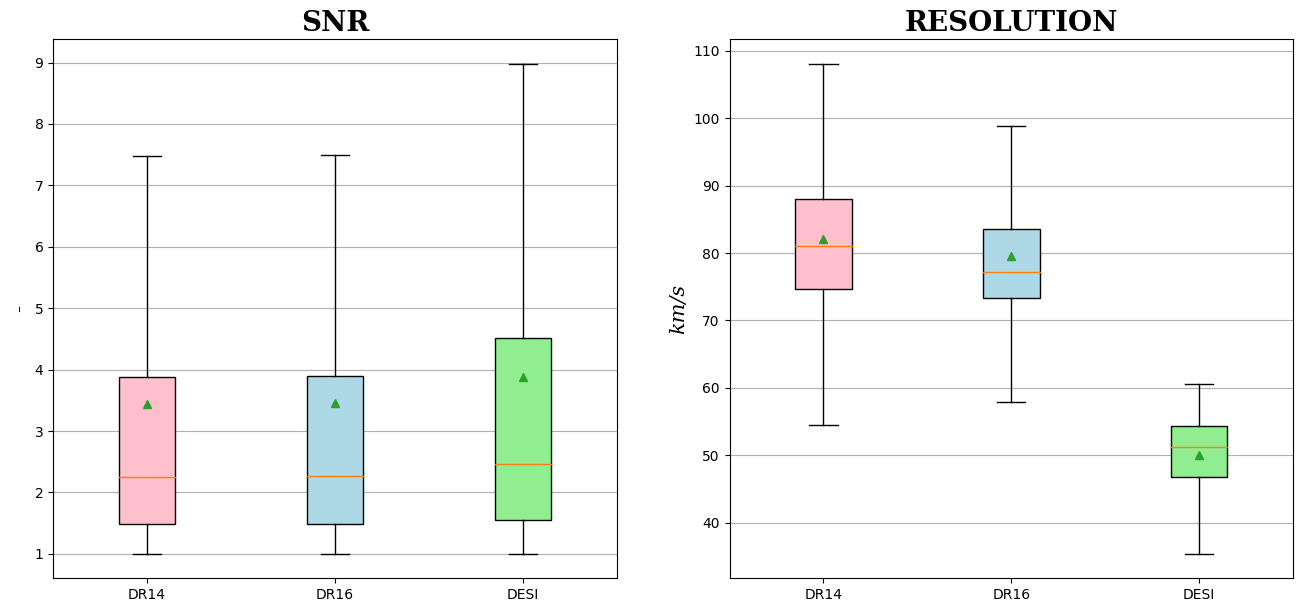

In [398]:

SNR = [np.array(X['MEANSNR']),np.array(Y['MEANSNR']),np.array(Z['MEANSNR'])]
RESO = [np.array(X['MEANRESO']),np.array(Y['MEANRESO']),np.array(Z['MEANRESO'])]
PIX = [np.array(X['MEANRESO_PIX']),np.array(Y['MEANRESO_PIX']),np.array(Z['MEANRESO_PIX'])]
Zav = [np.array(X['MEANZ']),np.array(Y['MEANZ']),np.array(Z['MEANZ'])]

print('DR14 - DR16 - DESI')
print(f"SNR - {np.mean([X['MEANSNR']])} - {np.mean([Y['MEANSNR']])} - {np.mean([Z['MEANSNR']])}")
print(f"RESO - {np.mean([X['MEANRESO']])} - {np.mean([Y['MEANRESO']])} - {np.mean([Z['MEANRESO']])}")


labels = ['DR14','DR16','DESI']

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

bplot1 = ax1.boxplot(SNR,
                     vert=True, 
                     patch_artist=True,  
                     labels=labels,
                     showfliers=False,
                     meanline = False,
                     showmeans=True,
                     notch =False)  
ax1.set_title('SNR',weight='semibold', 
            style= 'normal', family = 'serif', size =20)


L = []
n = 1.5
for a in range(25):
    n = n + 0.5 
    L.append(n)
ax1.set_ylabel('-',style = 'oblique',
           family = 'serif', size = 15)


bplot2 = ax2.boxplot(RESO,
                     vert=True, 
                     patch_artist=True,  
                     labels=labels,
                     showfliers=False,
                     meanline = False,
                     showmeans=True,
                     notch =False)  
ax2.set_title('RESOLUTION',weight='semibold', 
            style= 'normal', family = 'serif', size =20)
ax2.set_ylabel('km/s',style = 'oblique',
           family = 'serif', size = 15)


colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

for ax in [ax1,ax2]:
    ax.yaxis.grid(True)

plt.show()
